In [45]:
    #Frecuencia 1 
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

def frecuencia('path')
    # Cargar el archivo CSV especificando el delimitador correcto
    df = pd.read_csv(r'path', delimiter=';')

    # Mostrar las primeras filas para verificar que se ha cargado correctamente
    print("Datos cargados (sin eliminar NaN):")
    print(df.head(10))

    # Seleccionar solo las columnas de interés
    df_selected = df[['Time', 'Trayectoria 1/0/Y']]

    # Convertir la columna 'Time' a tipo numérico de manera segura
    df_selected.loc[:, 'Time'] = pd.to_numeric(df_selected['Time'].str.replace(',', '.'), errors='coerce')

    # Convertir la columna 'Trayectoria 2/0/Y' a tipo numérico de manera segura
    df_selected.loc[:, 'Trayectoria 1/0/Y'] = df_selected['Trayectoria 1/0/Y'].str.replace(',', '.')
    df_selected.loc[:, 'Trayectoria 1/0/Y'] = pd.to_numeric(df_selected['Trayectoria 1/0/Y'], errors='coerce')

    # Eliminar filas con valores NaN en las columnas seleccionadas
    df_cleaned = df_selected.dropna()

    # Mostrar el número de filas válidas y los datos limpios
    print("Número de filas válidas (sin NaN):", df_cleaned.shape[0])
    print("\nDatos después de limpiar NaN:")
    print(df_cleaned.head(10))


    # Asegurar que los datos estén en formato numpy array
    tiempo = np.array(df_selected.loc[:, 'Time'])

    # Convertir el tiempo de microsegundos a segundos
    tiempo = tiempo / 1e6  # Dividir entre 1,000,000 para convertir a segundos

    posicion_y = np.array(df_selected.loc[:, 'Trayectoria 1/0/Y'])

    # Eliminar los primeros datos (por ejemplo, los primeros 10)
    n_eliminar = 50  # Ajusta este número según necesites
    tiempo = tiempo[n_eliminar:]  # Eliminar las primeras n filas
    posicion_y = posicion_y[n_eliminar:]

    # Calcular el intervalo de tiempo (asumiendo que es constante)
    dt = tiempo[1] - tiempo[0]  # Diferencia entre dos puntos de tiempo consecutivos

    # Aplicar la Transformada de Fourier (FFT)
    N = len(tiempo)  # Número de puntos de la señal
    yf = fft(posicion_y)  # Transformada de Fourier
    xf = fftfreq(N, dt)[:N//2]  # Frecuencias correspondientes

    # Tomar la magnitud de la FFT
    magnitudes = 2.0/N * np.abs(yf[:N//2])

    # Filtrar frecuencias bajas (por ejemplo, menor a 0.5 Hz)
    threshold = 0.5  # Ajusta según necesites
    valid_indices = xf > threshold

    # Graficar para identificar el pico de frecuencia
    plt.plot(xf[valid_indices], magnitudes[valid_indices])
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')
    plt.title('Transformada de Fourier de la posición (frecuencias filtradas)')
    plt.grid()
    plt.show()

    # Identificar la frecuencia dominante
    frecuencia_dominante = xf[valid_indices][np.argmax(magnitudes[valid_indices])]
    print(f'La frecuencia de oscilación es {frecuencia_dominante} Hz')

SyntaxError: invalid syntax (3602562453.py, line 7)

In [46]:
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

def obtener_frecuencia(path, columna_trayectoria='Trayectoria 1/0/Y'):
    # Cargar el archivo CSV especificando el delimitador correcto
    df = pd.read_csv(path, delimiter=';')

    # Mostrar las primeras filas para verificar que se ha cargado correctamente
    print("Datos cargados (sin eliminar NaN):")
    print(df.head(10))

    # Seleccionar solo las columnas de interés
    df_selected = df[['Time', columna_trayectoria]]

    # Convertir la columna 'Time' a tipo numérico de manera segura
    df_selected.loc[:, 'Time'] = pd.to_numeric(df_selected['Time'].str.replace(',', '.'), errors='coerce')

    # Convertir la columna de trayectoria a tipo numérico de manera segura
    df_selected.loc[:, columna_trayectoria] = df_selected[columna_trayectoria].str.replace(',', '.')
    df_selected.loc[:, columna_trayectoria] = pd.to_numeric(df_selected[columna_trayectoria], errors='coerce')

    # Eliminar filas con valores NaN en las columnas seleccionadas
    df_cleaned = df_selected.dropna()

    # Mostrar el número de filas válidas y los datos limpios
    print("Número de filas válidas (sin NaN):", df_cleaned.shape[0])
    print("\nDatos después de limpiar NaN:")
    print(df_cleaned.head(10))

    # Asegurar que los datos estén en formato numpy array
    tiempo = np.array(df_cleaned['Time'])

    # Convertir el tiempo de microsegundos a segundos
    tiempo = tiempo / 1e6  # Dividir entre 1,000,000 para convertir a segundos

    posicion_y = np.array(df_cleaned[columna_trayectoria])

    # Eliminar los primeros datos (por ejemplo, los primeros 10)
    n_eliminar = 0  # Ajusta este número según necesites
    tiempo = tiempo[n_eliminar:]  # Eliminar las primeras n filas
    posicion_y = posicion_y[n_eliminar:]

    # Calcular el intervalo de tiempo (asumiendo que es constante)
    dt = tiempo[1] - tiempo[0]  # Diferencia entre dos puntos de tiempo consecutivos

    # Aplicar la Transformada de Fourier (FFT)
    N = len(tiempo)  # Número de puntos de la señal
    yf = fft(posicion_y)  # Transformada de Fourier
    xf = fftfreq(N, dt)[:N//2]  # Frecuencias correspondientes

    # Tomar la magnitud de la FFT
    magnitudes = 2.0/N * np.abs(yf[:N//2])

    # Filtrar frecuencias bajas (por ejemplo, menor a 0.5 Hz)
    threshold = 0.5  # Ajusta según necesites
    valid_indices = xf > threshold

    # Graficar para identificar el pico de frecuencia
    plt.plot(xf[valid_indices], magnitudes[valid_indices])
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')
    plt.title('Transformada de Fourier de la posición (frecuencias filtradas)')
    plt.grid()
    plt.show()

    # Identificar la frecuencia dominante
    frecuencia_dominante = xf[valid_indices][np.argmax(magnitudes[valid_indices])]
    print(f'La frecuencia de oscilación es {frecuencia_dominante} Hz')
    
    return frecuencia_dominante


Datos cargados (sin eliminar NaN):
       Time Trayectoria 1/0/X Trayectoria 1/0/Y
0         0         0,1465759          0,122406
1  33333,33         0,1551971        -0,8656921
2  66666,66         0,1782074        -0,8712158
3    100000         0,2122498        -0,8861847
4  133333,3         0,2556152         -1,877563
5  166666,7          1,187256         -1,876511
6    200000          1,139633         -1,890259
7  233333,3           1,10051         -2,885376
8  266666,7           1,08078         -2,893875
9    300000          1,064392         -3,881104
Número de filas válidas (sin NaN): 150

Datos después de limpiar NaN:
       Time Trayectoria 1/0/Y
0       0.0          0.122406
1  33333.33         -0.865692
2  66666.66         -0.871216
3  100000.0         -0.886185
4  133333.3         -1.877563
5  166666.7         -1.876511
6  200000.0         -1.890259
7  233333.3         -2.885376
8  266666.7         -2.893875
9  300000.0         -3.881104


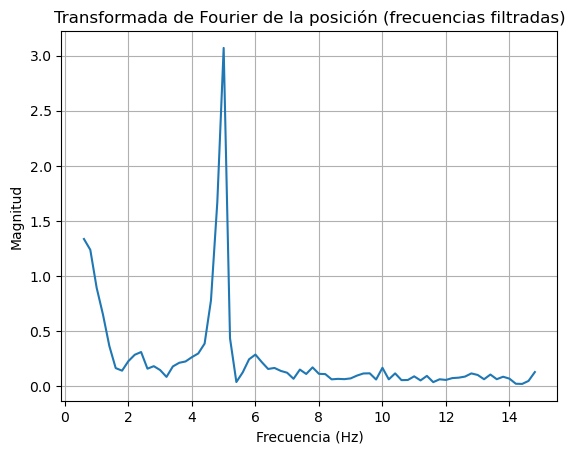

La frecuencia de oscilación es 5.000000500000049 Hz
Datos cargados (sin eliminar NaN):
       Time Trayectoria 1/0/X Trayectoria 1/0/Y
0         0         0,1659546        0,06468201
1  33333,33        -0,8103638          4,050461
2  66666,66        -0,8258667          7,064194
3    100000         -1,805496          9,080582
4  133333,3        -0,8193054           7,09465
5  166666,7        -0,8001709          4,082947
6    200000          0,180542          1,071625
7  233333,3         0,1570892          1,097504
8  266666,7        -0,8539124          5,117172
9    300000         -1,837143          9,104065
Número de filas válidas (sin NaN): 150

Datos después de limpiar NaN:
       Time Trayectoria 1/0/Y
0       0.0          0.064682
1  33333.33          4.050461
2  66666.66          7.064194
3  100000.0          9.080582
4  133333.3           7.09465
5  166666.7          4.082947
6  200000.0          1.071625
7  233333.3          1.097504
8  266666.7          5.117172
9  300000.0    

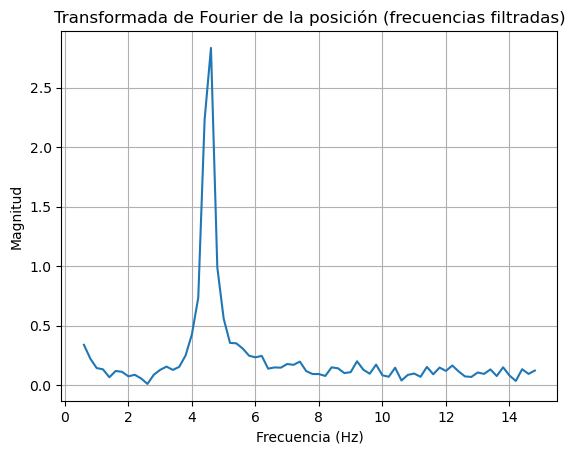

La frecuencia de oscilación es 4.600000460000046 Hz


In [37]:
frecuencia10 = obtener_frecuencia(r'c:\Users\chelo\Videos\Pesos lab vibras\1 10 N.csv', 'Trayectoria 1/0/Y')
f15 = obtener_frecuencia(r'C:\Users\chelo\Videos\Pesos lab vibras\15 N.csv', 'Trayectoria 1/0/Y')



Datos cargados (sin eliminar NaN):
       Time Trayectoria 1/0/X Trayectoria 1/0/Y
0         0         0,2449799         0,1787415
1  33333,33        -0,7329712        -0,8442993
2  66666,66         0,2399902          -13,8555
3    100000         0,2307739         -28,82516
4  133333,3         0,2007446         -33,84171
5  166666,7        -0,7798004         -25,85266
6    200000        -0,8284302         -9,838104
7  233333,3         -2,814346          4,135223
8  266666,7         -2,834427          5,132095
9    300000         -2,809723         -6,836304
Número de filas válidas (sin NaN): 150

Datos después de limpiar NaN:
       Time Trayectoria 1/0/Y
0       0.0          0.178741
1  33333.33         -0.844299
2  66666.66          -13.8555
3  100000.0         -28.82516
4  133333.3         -33.84171
5  166666.7         -25.85266
6  200000.0         -9.838104
7  233333.3          4.135223
8  266666.7          5.132095
9  300000.0         -6.836304


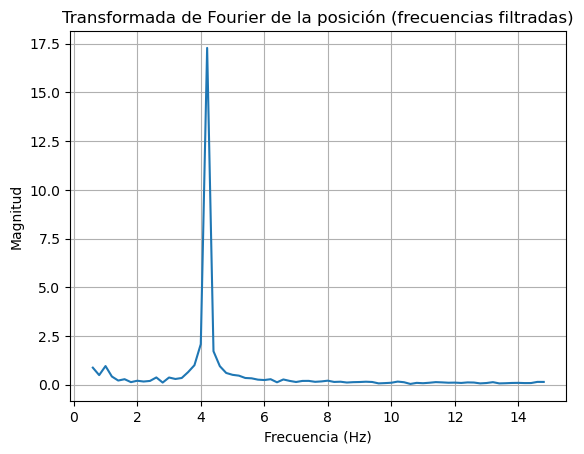

La frecuencia de oscilación es 4.200000420000041 Hz
Datos cargados (sin eliminar NaN):
       Time Trayectoria 1/0/X Trayectoria 1/0/Y
0         0        -0,2855988        -0,2854919
1  33333,33        -0,2987061          3,719818
2  66666,66           -1,2883          10,74451
3    100000           -2,2836          16,77911
4  133333,3         -3,258698          17,79523
5  166666,7         -3,258011           12,8172
6    200000         -3,287506          4,856323
7  233333,3         -4,263306         -1,150574
8  266666,7         -4,280609         -1,158478
9    300000         -5,260101          3,851318
Número de filas válidas (sin NaN): 100

Datos después de limpiar NaN:
       Time Trayectoria 1/0/Y
0       0.0         -0.285492
1  33333.33          3.719818
2  66666.66          10.74451
3  100000.0          16.77911
4  133333.3          17.79523
5  166666.7           12.8172
6  200000.0          4.856323
7  233333.3         -1.150574
8  266666.7         -1.158478
9  300000.0    

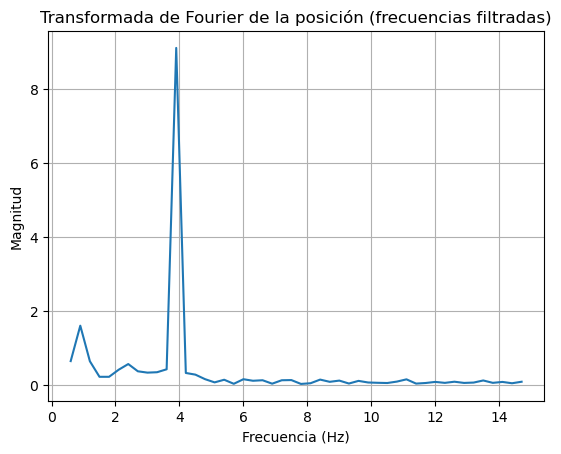

La frecuencia de oscilación es 3.900000390000039 Hz
Datos cargados (sin eliminar NaN):
       Time Trayectoria 1/0/X Trayectoria 1/0/Y
0         0        -0,2784882         0,1455994
1  33333,33        -0,2762909         -13,86551
2  66666,66        -0,2751007         -24,86472
3    100000         -1,258591         -25,86002
4  133333,3          -2,25209         -16,86319
5  166666,7         -3,263992         -2,864716
6    200000         -4,279099          8,132996
7  233333,3         -5,261688          9,144592
8  266666,7         -4,258698         0,1557007
9    300000         -3,252289         -13,84149
Número de filas válidas (sin NaN): 150

Datos después de limpiar NaN:
       Time Trayectoria 1/0/Y
0       0.0          0.145599
1  33333.33         -13.86551
2  66666.66         -24.86472
3  100000.0         -25.86002
4  133333.3         -16.86319
5  166666.7         -2.864716
6  200000.0          8.132996
7  233333.3          9.144592
8  266666.7          0.155701
9  300000.0    

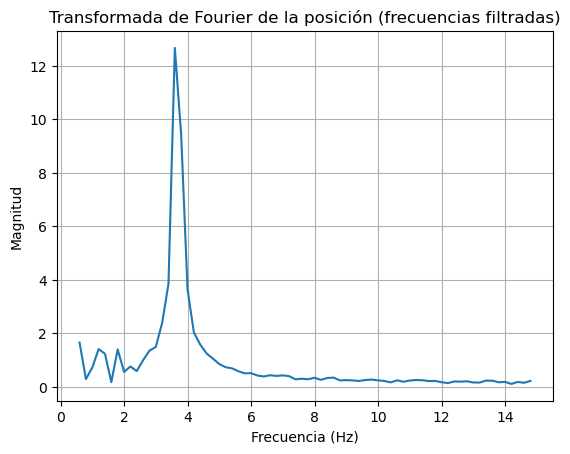

La frecuencia de oscilación es 3.6000003600000356 Hz
Datos cargados (sin eliminar NaN):
       Time Trayectoria 1/0/X Trayectoria 1/0/Y
0         0         -0,319397         0,1643066
1  33333,33           -1,3367           15,1557
2  66666,66         -2,344299          21,15759
3    100000         -2,379501          17,14789
4  133333,3         -2,420197          3,143799
5  166666,7         -3,391708         -12,85931
6    200000         -3,389206          -22,8613
7  233333,3         -4,379898         -22,86621
8  266666,7         -5,394608          -13,8577
9    300000         -7,375198          1,140198
Número de filas válidas (sin NaN): 150

Datos después de limpiar NaN:
       Time Trayectoria 1/0/Y
0       0.0          0.164307
1  33333.33           15.1557
2  66666.66          21.15759
3  100000.0          17.14789
4  133333.3          3.143799
5  166666.7         -12.85931
6  200000.0          -22.8613
7  233333.3         -22.86621
8  266666.7          -13.8577
9  300000.0   

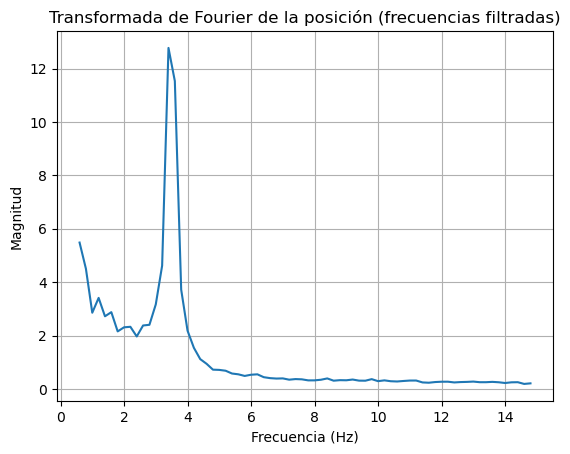

La frecuencia de oscilación es 3.4000003400000334 Hz
Datos cargados (sin eliminar NaN):
       Time Trayectoria 1/0/X Trayectoria 1/0/Y
0         0         -0,297699         0,2976074
1  33333,33         0,6813049         -6,729797
2  66666,66          1,640808         -17,71881
3    100000          1,620804         -25,73199
4  133333,3            1,6008          -28,7084
5  166666,7          1,565903         -23,73239
6    200000         0,5800018          -14,7359
7  233333,3         0,5648041         -4,748718
8  266666,7        -0,4203033          1,226288
9    300000        -0,4039917         -0,743103
Número de filas válidas (sin NaN): 150

Datos después de limpiar NaN:
       Time Trayectoria 1/0/Y
0       0.0          0.297607
1  33333.33         -6.729797
2  66666.66         -17.71881
3  100000.0         -25.73199
4  133333.3          -28.7084
5  166666.7         -23.73239
6  200000.0          -14.7359
7  233333.3         -4.748718
8  266666.7          1.226288
9  300000.0   

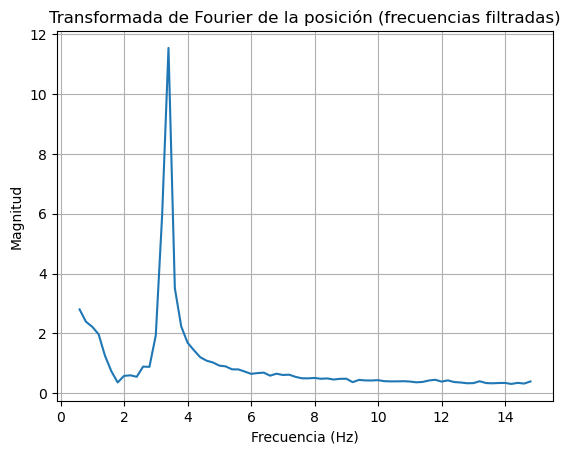

La frecuencia de oscilación es 3.4000003400000334 Hz


In [47]:
f20 = obtener_frecuencia(r'C:\Users\chelo\Videos\Pesos lab vibras\20 N.csv', 'Trayectoria 1/0/Y')
f25 = obtener_frecuencia(r'C:\Users\chelo\Videos\Pesos lab vibras\25 N.csv', 'Trayectoria 1/0/Y')
f30 = obtener_frecuencia(r'C:\Users\chelo\Videos\Pesos lab vibras\30 N.csv', 'Trayectoria 1/0/Y')
f35 = obtener_frecuencia(r'C:\Users\chelo\Videos\Pesos lab vibras\35.csv', 'Trayectoria 1/0/Y')
f40 = obtener_frecuencia(r'C:\Users\chelo\Videos\Pesos lab vibras\40.csv', 'Trayectoria 1/0/Y')





Datos cargados (sin eliminar NaN):
       Time Trayectoria 1/0/X Trayectoria 1/0/Y
0  834160,9        -0,6065674                 0
1  867527,3        -0,6439819          3,006561
2  900893,8         -1,605438          9,004456
3  934260,2         -1,591217          11,99951
4   1000993         -1,573593          9,988739
5   1034360         -1,530487          3,988739
6   1067726         -1,478516         0,9983521
7   1101092         -1,439362           3,99408
8   1134459         -1,460678          9,986206
9   1167825         -1,526154          12,98697
Número de filas válidas (sin NaN): 504

Datos después de limpiar NaN:
        Time Trayectoria 1/0/Y
0   834160.9               0.0
1   867527.3          3.006561
2   900893.8          9.004456
3   934260.2          11.99951
4  1000993.0          9.988739
5  1034360.0          3.988739
6  1067726.0          0.998352
7  1101092.0           3.99408
8  1134459.0          9.986206
9  1167825.0          12.98697


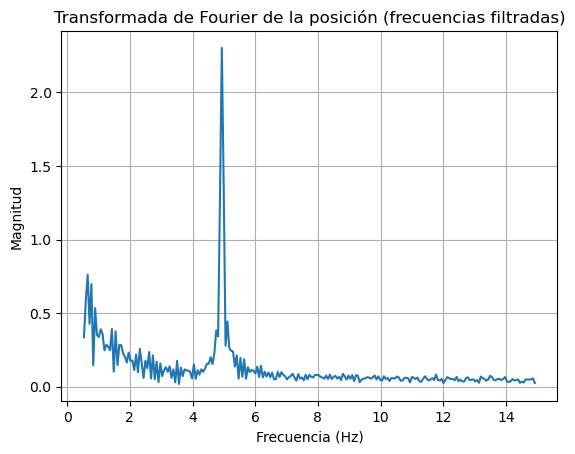

La frecuencia de oscilación es 4.935580095021926 Hz
Datos cargados (sin eliminar NaN):
       Time Trayectoria 1/0/X Trayectoria 1/0/Y
0         0        -0,2545471                 0
1  33381,16        -0,2447662          -1,99469
2  66762,31         0,7309418         -4,958374
3  100143,5         0,7242279         -5,975525
4  133524,6         0,7281647         -5,945679
5  166905,8         0,7402954         -2,975006
6  200286,9         0,7559814         -1,945984
7  233668,1         0,7733307         -1,916138
8  267049,3          1,760269         -3,888763
9  300430,4          1,777145         -5,878479
Número de filas válidas (sin NaN): 477

Datos después de limpiar NaN:
       Time Trayectoria 1/0/Y
0       0.0               0.0
1  33381.16          -1.99469
2  66762.31         -4.958374
3  100143.5         -5.975525
4  133524.6         -5.945679
5  166905.8         -2.975006
6  200286.9         -1.945984
7  233668.1         -1.916138
8  267049.3         -3.888763
9  300430.4    

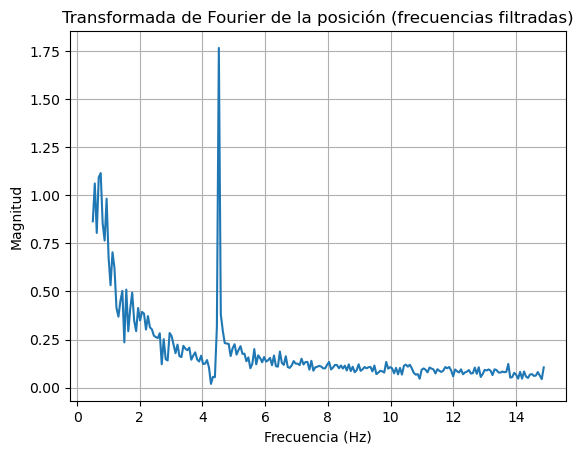

La frecuencia de oscilación es 4.521813988082352 Hz
Datos cargados (sin eliminar NaN):
      Time Trayectoria 1/0/X Trayectoria 1/0/Y
0  3674165        -0,2545471        -0,2545166
1  3707567        -0,2592773         0,7394104
2  3740968        -0,3088837          11,74643
3  3774370         -1,314117          25,74298
4  3807771         -1,326752          31,74646
5  3841173        -0,3583527          25,75479
6  3874574         0,6226959          12,75052
7  3907976          1,605072         0,7650757
8  3941377          1,636887        -0,2217712
9  3974779          1,673355          10,77136
Número de filas válidas (sin NaN): 363

Datos después de limpiar NaN:
        Time Trayectoria 1/0/Y
0  3674165.0         -0.254517
1  3707567.0           0.73941
2  3740968.0          11.74643
3  3774370.0          25.74298
4  3807771.0          31.74646
5  3841173.0          25.75479
6  3874574.0          12.75052
7  3907976.0          0.765076
8  3941377.0         -0.221771
9  3974779.0    

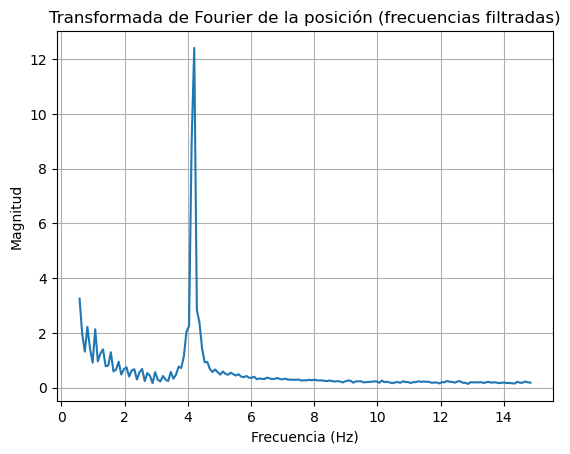

La frecuencia de oscilación es 4.206211237907742 Hz
Datos cargados (sin eliminar NaN):
       Time Trayectoria 1/0/X Trayectoria 1/0/Y
0         0        -0,4034424         -1,210266
1  33445,95        -0,3879852          -1,23996
2  66891,89         0,6045837         -2,237915
3  100337,8         0,6167603         -3,238983
4  133783,8          1,594788         -5,217468
5  167229,7          1,602203          -6,22998
6  200675,7           2,58963         -7,243317
7  234121,6          3,553787         -7,269409
8  267567,6          3,559784         -6,286835
9  301013,5          4,538483         -5,262939
Número de filas válidas (sin NaN): 269

Datos después de limpiar NaN:
       Time Trayectoria 1/0/Y
0       0.0         -1.210266
1  33445.95          -1.23996
2  66891.89         -2.237915
3  100337.8         -3.238983
4  133783.8         -5.217468
5  167229.7          -6.22998
6  200675.7         -7.243317
7  234121.6         -7.269409
8  267567.6         -6.286835
9  301013.5    

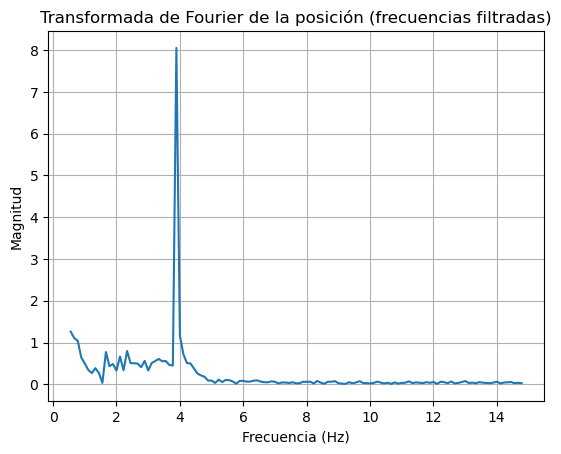

La frecuencia de oscilación es 3.8902026751690055 Hz
Datos cargados (sin eliminar NaN):
      Time Trayectoria 1/0/X Trayectoria 1/0/Y
0  2137592                 0          3,05E-05
1  2170991       0,002197266          2,015106
2  2204391         0,9749146         -5,980896
3  2237791         0,9884491         -20,97449
4  2271191          1,978973         -33,96637
5  2304591          1,969864          -37,9823
6  2337991          1,948257          -32,9726
7  2371391         0,9307556         -19,96777
8  2404791         -1,050964         -6,982208
9  2438190         -2,031357         -2,966919
Número de filas válidas (sin NaN): 384

Datos después de limpiar NaN:
        Time Trayectoria 1/0/Y
0  2137592.0           0.00003
1  2170991.0          2.015106
2  2204391.0         -5.980896
3  2237791.0         -20.97449
4  2271191.0         -33.96637
5  2304591.0          -37.9823
6  2337991.0          -32.9726
7  2371391.0         -19.96777
8  2404791.0         -6.982208
9  2438190.0   

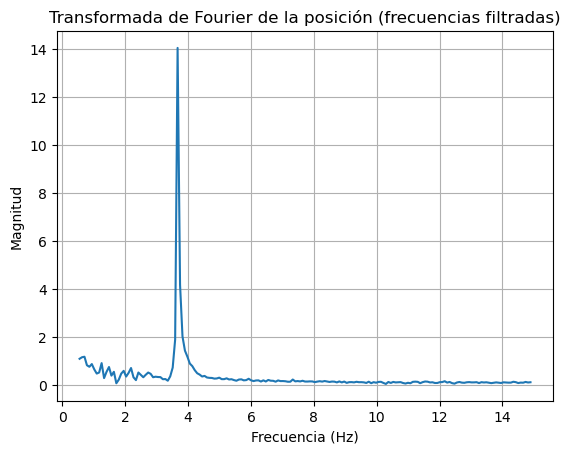

La frecuencia de oscilación es 3.6646556284120577 Hz
Datos cargados (sin eliminar NaN):
       Time Trayectoria 1/0/X Trayectoria 1/0/Y
0         0        -0,3595428         0,7190857
1  33388,07         -1,376144          15,71033
2  66776,13         -2,382751          21,71176
3  100164,2          -2,41803          16,72519
4  133552,3         -2,459122          3,721008
5  166940,3         -3,429169         -12,28244
6  200328,4         -3,426132         -22,28467
7  233716,5         -4,415405         -22,28983
8  267104,5         -5,429199          -13,2814
9  300492,6          -7,40921          1,715851
Número de filas válidas (sin NaN): 480

Datos después de limpiar NaN:
       Time Trayectoria 1/0/Y
0       0.0          0.719086
1  33388.07          15.71033
2  66776.13          21.71176
3  100164.2          16.72519
4  133552.3          3.721008
5  166940.3         -12.28244
6  200328.4         -22.28467
7  233716.5         -22.28983
8  267104.5          -13.2814
9  300492.6   

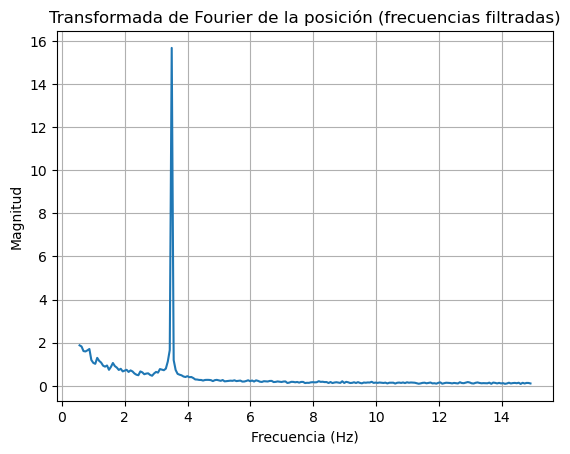

La frecuencia de oscilación es 3.4942620722511566 Hz
Datos cargados (sin eliminar NaN):
       Time Trayectoria 1/0/X Trayectoria 1/0/Y
0         0        -0,5078888        -0,5078735
1  33383,91        -0,4898529        -0,5298157
2  66767,83         0,4846344          -1,50473
3  100151,7         0,4779968         -1,481232
4  133535,7         0,4875793         -1,456604
5  166919,6          1,431137         -1,432709
6  200303,5          1,401001         -1,409424
7  233687,4          1,376144         -1,386322
8  267071,3          1,361969         -1,360718
9  300455,3          1,366226        -0,3874512
Número de filas válidas (sin NaN): 639

Datos después de limpiar NaN:
       Time Trayectoria 1/0/Y
0       0.0         -0.507873
1  33383.91         -0.529816
2  66767.83          -1.50473
3  100151.7         -1.481232
4  133535.7         -1.456604
5  166919.6         -1.432709
6  200303.5         -1.409424
7  233687.4         -1.386322
8  267071.3         -1.360718
9  300455.3   

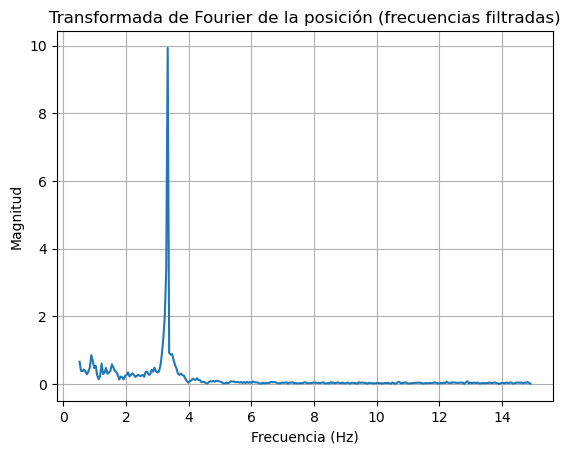

La frecuencia de oscilación es 3.3282833290381832 Hz


In [54]:
fb = obtener_frecuencia(r'C:\Users\chelo\Videos\Pesos lab vibras\2 10N.csv', 'Trayectoria 1/0/Y')
fa = obtener_frecuencia(r'C:\Users\chelo\Videos\Pesos lab vibras\3 15N.csv', 'Trayectoria 1/0/Y')
fb = obtener_frecuencia(r'C:\Users\chelo\Videos\Pesos lab vibras\4 20 N.csv', 'Trayectoria 1/0/Y')
fb = obtener_frecuencia(r'C:\Users\chelo\Videos\Pesos lab vibras\5 25 N.csv', 'Trayectoria 1/0/Y')

fb = obtener_frecuencia(r'C:\Users\chelo\Videos\Pesos lab vibras\6 30 N.csv', 'Trayectoria 1/0/Y')
fa = obtener_frecuencia(r'C:\Users\chelo\Videos\Pesos lab vibras\7 35 discos.csv', 'Trayectoria 1/0/Y')
fb = obtener_frecuencia(r'C:\Users\chelo\Videos\Pesos lab vibras\8 40 N.csv', 'Trayectoria 1/0/Y')


In [27]:
import pandas as pd

# Ruta del archivo CSV
path = r'C:\Users\chelo\Videos\Pesos lab vibras\2 10 N.csv'

# Intenta cargar el archivo
try:
    df = pd.read_csv(path, delimiter=';')
    print("Archivo cargado exitosamente:")
    print(df.head())
except FileNotFoundError:
    print("El archivo no se encontró en la ruta especificada. Verifica la ruta y el nombre del archivo.")
except Exception as e:
    print(f"Ocurrió un error: {e}")


El archivo no se encontró en la ruta especificada. Verifica la ruta y el nombre del archivo.


In [29]:
fb = obtener_frecuencia(r'C:\Users\chelo\Videos\Pesos lab vibras\2 10 N.csv', 'Trayectoria 1/0/Y')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\chelo\\Videos\\Pesos lab vibras\\2 10 N.csv'

In [43]:
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

def obtener_frecuencia2(path, columna_trayectoria='Trayectoria 1/0/Y'):
    # Cargar el archivo CSV especificando el delimitador correcto
    df = pd.read_csv(path, delimiter=':')

    # Mostrar las primeras filas para verificar que se ha cargado correctamente
    print("Datos cargados (sin eliminar NaN):")
    print(df.head(10))

    # Seleccionar solo las columnas de interés
    df_selected = df[['Time', columna_trayectoria]]

    # Convertir la columna 'Time' a tipo numérico de manera segura
    df_selected.loc[:, 'Time'] = pd.to_numeric(df_selected['Time'].str.replace(',', '.'), errors='coerce')

    # Convertir la columna de trayectoria a tipo numérico de manera segura
    df_selected.loc[:, columna_trayectoria] = df_selected[columna_trayectoria].str.replace(',', '.')
    df_selected.loc[:, columna_trayectoria] = pd.to_numeric(df_selected[columna_trayectoria], errors='coerce')

    # Eliminar filas con valores NaN en las columnas seleccionadas
    df_cleaned = df_selected.dropna()

    # Mostrar el número de filas válidas y los datos limpios
    print("Número de filas válidas (sin NaN):", df_cleaned.shape[0])
    print("\nDatos después de limpiar NaN:")
    print(df_cleaned.head(10))

    # Asegurar que los datos estén en formato numpy array
    tiempo = np.array(df_cleaned['Time'])

    # Convertir el tiempo de microsegundos a segundos
    tiempo = tiempo / 1e6  # Dividir entre 1,000,000 para convertir a segundos

    posicion_y = np.array(df_cleaned[columna_trayectoria])

    # Eliminar los primeros datos (por ejemplo, los primeros 10)
    n_eliminar = 0  # Ajusta este número según necesites
    tiempo = tiempo[n_eliminar:]  # Eliminar las primeras n filas
    posicion_y = posicion_y[n_eliminar:]

    # Calcular el intervalo de tiempo (asumiendo que es constante)
    dt = tiempo[1] - tiempo[0]  # Diferencia entre dos puntos de tiempo consecutivos

    # Aplicar la Transformada de Fourier (FFT)
    N = len(tiempo)  # Número de puntos de la señal
    yf = fft(posicion_y)  # Transformada de Fourier
    xf = fftfreq(N, dt)[:N//2]  # Frecuencias correspondientes

    # Tomar la magnitud de la FFT
    magnitudes = 2.0/N * np.abs(yf[:N//2])

    # Filtrar frecuencias bajas (por ejemplo, menor a 0.5 Hz)
    threshold = 0.5  # Ajusta según necesites
    valid_indices = xf > threshold

    # Graficar para identificar el pico de frecuencia
    plt.plot(xf[valid_indices], magnitudes[valid_indices])
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')
    plt.title('Transformada de Fourier de la posición (frecuencias filtradas)')
    plt.grid()
    plt.show()

    # Identificar la frecuencia dominante
    frecuencia_dominante = xf[valid_indices][np.argmax(magnitudes[valid_indices])]
    print(f'La frecuencia de oscilación es {frecuencia_dominante} Hz')
    
    return frecuencia_dominante


In [44]:
fb = obtener_frecuencia2(r'C:\Users\chelo\Videos\Pesos lab vibras\2 10 N.csv', 'Trayectoria 1/0/Y')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\chelo\\Videos\\Pesos lab vibras\\2 10 N.csv'

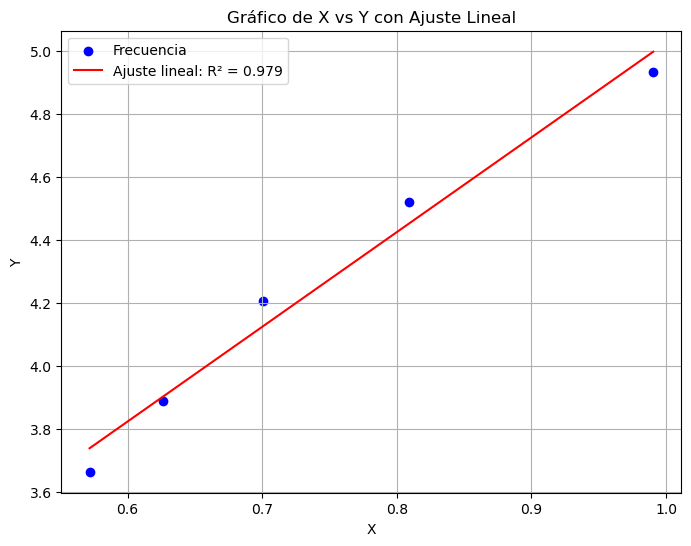

R²: 0.979
Intercepto (intersección con el eje Y): 2.021
Pendiente: 3.006
masa ajuste lineal 0.7359536009090577


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Arreglos de ejemplo
X = np.array([0.99045, 0.80870, 0.70036, 0.62642, 0.57184])
Y = np.array([4.935, 4.522, 4.206, 3.890, 3.665])

# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(X, Y)

# Calcular los valores ajustados
Y_fit = slope * X + intercept

# Calcular R^2
r_squared = r_value**2

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Frecuencia')
plt.plot(X, Y_fit, color='red', label='Ajuste lineal: R² = {:.3f}'.format(r_squared))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de X vs Y con Ajuste Lineal')
plt.legend()
plt.grid()
plt.show()

# Imprimir R^2
print(f'R²: {r_squared:.3f}')
print(f'Intercepto (intersección con el eje Y): {intercept:.3f}')
print(f'Pendiente: {slope:.3f}')

print("masa ajuste lineal", slope/2.021**2)


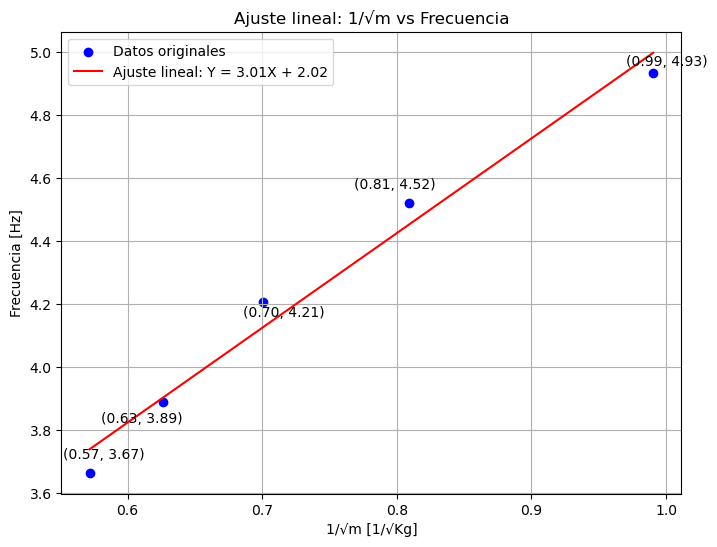

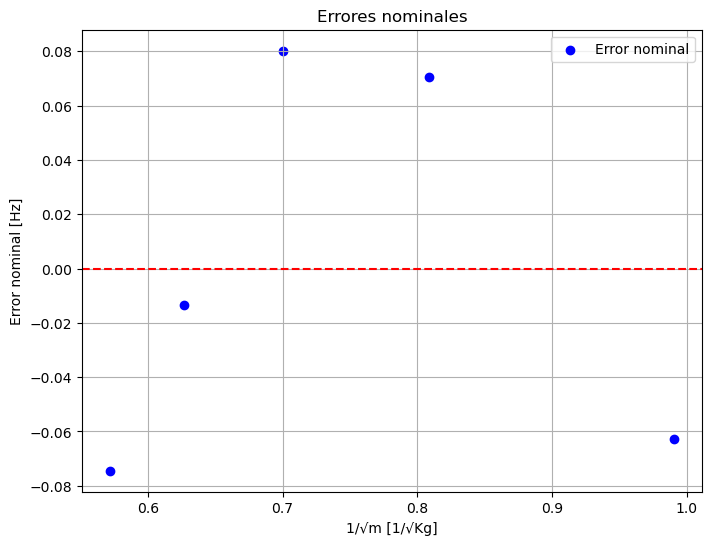

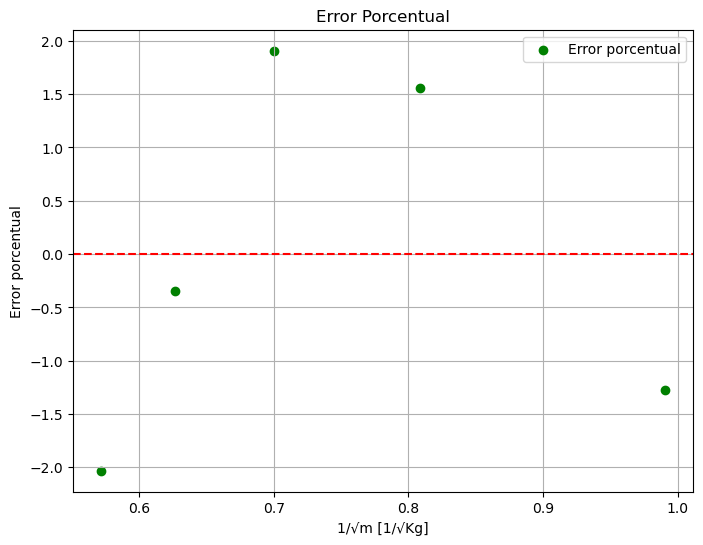

Errores nominales: [-0.0627831   0.07054995  0.08021556 -0.01352383 -0.07445858]
Errores porcentuales: [-1.2722007   1.56014937  1.90716974 -0.34765623 -2.03161206]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Ejemplo de datos de masas m y frecuencias
X = np.array([0.99045, 0.80870, 0.70036, 0.62642, 0.57184])  # Puedes ajustar estos valores según tu caso
frecuencia = np.array([4.935, 4.522, 4.206, 3.890, 3.665])  # Valores de frecuencia correspondientes

# Calcular X como 1/raíz(m)
#X = 1 / np.sqrt(m)

# Y son los valores de frecuencia
Y = frecuencia

# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(X, Y)

# Calcular los valores ajustados
Y_fit = slope * X + intercept

# Calcular errores nominales y porcentuales
error_nominal = Y - Y_fit
error_porcentual = 100 * error_nominal / Y

# Variación en la posición de las etiquetas según el índice del punto
offsets = [(10, 5), (-10, 10), (15, -10), (-15, -15), (10, 10)]  # Ejemplo de desplazamientos

# Gráfico de ajuste lineal (X vs Y)
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Datos originales')
plt.plot(X, Y_fit, color='red', label=f'Ajuste lineal: Y = {slope:.2f}X + {intercept:.2f}')
# Etiquetar los puntos con variación en la posición
for i, (x_val, f_val) in enumerate(zip(X, frecuencia)):
    plt.annotate(f"({x_val:.2f}, {f_val:.2f})",  # Formato con dos decimales
                 (x_val, f_val),                 # Coordenadas del punto
                 textcoords="offset points",     # Offset para que el texto no esté encima del punto
                 xytext=offsets[i],              # Desplazar el texto según el índice
                 ha='center')                    # Alinear horizontalmente el texto

plt.xlabel('1/√m [1/√Kg]')
plt.ylabel('Frecuencia [Hz]')
plt.title('Ajuste lineal: 1/√m vs Frecuencia')
plt.grid(True)
plt.legend()
plt.show()

# Gráfico de errores nominales
plt.figure(figsize=(8, 6))
plt.scatter(X, error_nominal, color='blue', label='Error nominal')
plt.axhline(0, color='red', linestyle='--')  # Línea de error 0
plt.xlabel('1/√m [1/√Kg]')
plt.ylabel('Error nominal [Hz]')
plt.title('Errores nominales')
plt.grid(True)
plt.legend()
plt.show()

# Gráfico de errores porcentuales
plt.figure(figsize=(8, 6))
plt.scatter(X, error_porcentual, color='green', label='Error porcentual')
plt.axhline(0, color='red', linestyle='--')  # Línea de error 0
plt.xlabel('1/√m [1/√Kg]')
plt.ylabel('Error porcentual')
plt.title('Error Porcentual')
plt.grid(True)
plt.legend()
plt.show()

# Imprimir los errores nominales y porcentuales
print(f"Errores nominales: {error_nominal}")
print(f"Errores porcentuales: {error_porcentual}")


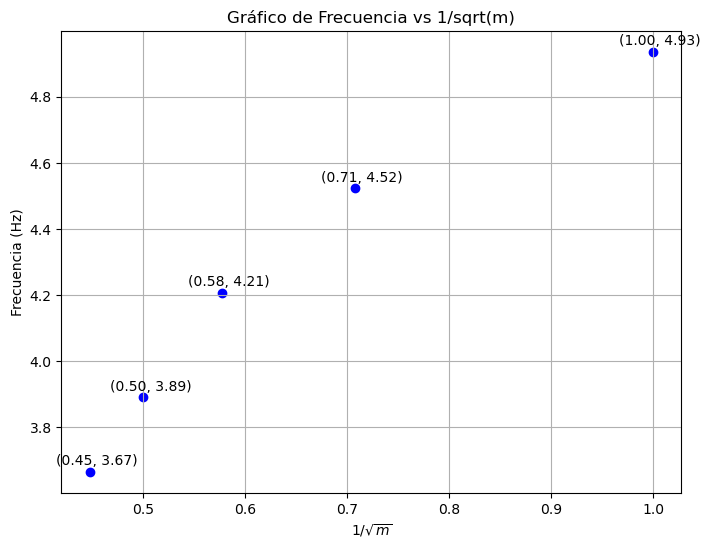

La frecuencia del sistema w_ 1 es 1.9577478473881702
La masa del sistema, asociada a la recta  1 es 0.7842771308460869
La frecuencia del sistema w_ 2 es 2.091080906843166
La masa del sistema, asociada a la recta  2 es 0.6874504307099726
La frecuencia del sistema w_ 3 es 2.1007465115823916
La masa del sistema, asociada a la recta  3 es 0.6811390189942811
La frecuencia del sistema w_ 4 es 2.007007124600836
La masa del sistema, asociada a la recta  4 es 0.7462515277746765
La frecuencia del sistema w_ 5 es 1.9460723701857252
La masa del sistema, asociada a la recta  5 es 0.7937159143980899


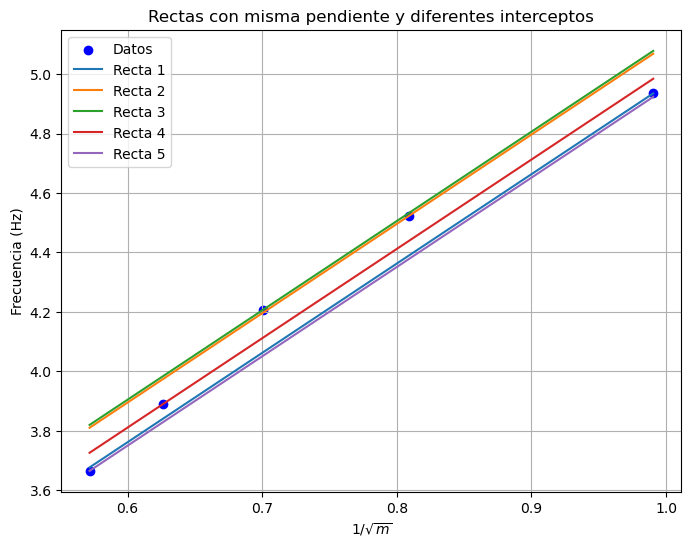

0.7362953304362475


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Datos de ejemplo
X = np.array([0.99045, 0.80870, 0.70036, 0.62642, 0.57184])  # Valores de 1/sqrt(m)
frecuencia = np.array([4.935, 4.522, 4.206, 3.890, 3.665])  # Frecuencias correspondientes

# Realizar el ajuste lineal para obtener la pendiente
slope, intercept, r_value, p_value, std_err = linregress(X, frecuencia)

# Crear el gráfico con los puntos
plt.figure(figsize=(8, 6))
plt.scatter(X, frecuencia, color='blue', label='Datos')

# Graficar 5 rectas con la misma pendiente y diferentes interceptos
X_range = np.linspace(min(X), max(X), 100)  # Generar puntos para graficar las rectas

for i in range(len(X)):
    intercepto_i = frecuencia[i] - slope * X[i]  # Calcular el intercepto de cada recta
    Y_fit_i = slope * X_range + intercepto_i  # Ecuación de la recta ajustada
    plt.plot(X_range, Y_fit_i, label=f'Recta {i+1}')
    print("La frecuencia del sistema w_",i+1,"es", intercepto_i)
    print("La masa del sistema, asociada a la recta ", i+1,"es", slope/intercepto_i**2)

# Etiquetas y título
plt.xlabel(r'$1/\sqrt{m}$')
plt.ylabel('Frecuencia (Hz)')
plt.title('Rectas con misma pendiente y diferentes interceptos')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()
w=np.mean([1.9577478473881702,2.091080906843166, 2.1007465115823916, 2.00700712460083, 1.9460723701857252])
masa_sistema=slope/w**2
print(masa_sistema)



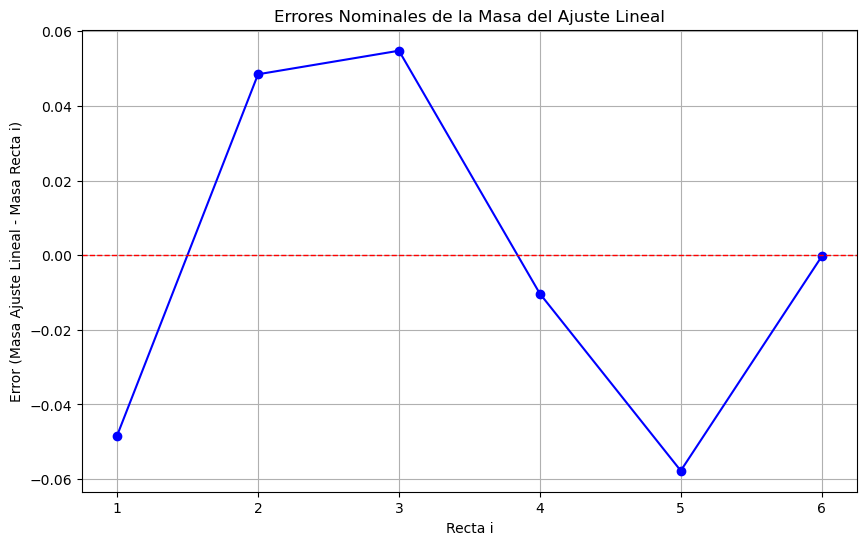

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
masa = np.array([0.99045, 0.80870, 0.70036, 0.62642, 0.57184])  # Valores de 1/sqrt(m)
frecuencias = np.array([4.935, 4.522, 4.206, 3.890, 3.665])  # Frecuencias correspondientes
masa_ajuste_lineal = 0.7359536009090577

# Calcular los errores nominales
errores = [masa_ajuste_lineal - masa for masa in masas]

# Ejes para el gráfico
rectas = np.arange(1, len(errores) + 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(rectas, errores, marker='o', linestyle='-', color='b')
plt.axhline(0, color='r', linestyle='--', linewidth=1)
plt.title('Errores Nominales de la Masa del Ajuste Lineal')
plt.xlabel('Recta i')
plt.ylabel('Error (Masa Ajuste Lineal - Masa Recta i)')
plt.xticks(rectas)
plt.grid()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


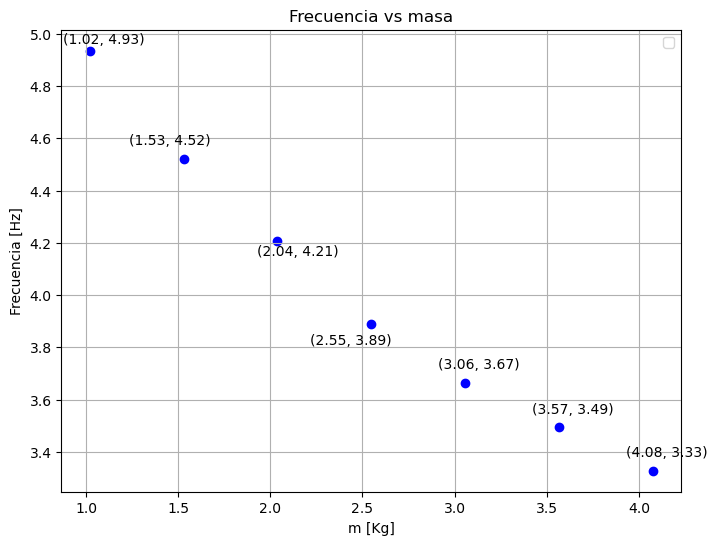

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Ejemplo de datos de masas m y frecuencias
X = np.array([1.019367992,1.529051988,2.038735984,2.54841998,3.058103976,3.567787971,4.077471967])  # Puedes ajustar estos valores según tu caso
frecuencia = np.array([4.935,4.522,4.206,3.890,3.665,3.494,3.328])  # Valores de frecuencia correspondientes

# Calcular X como 1/raíz(m)
#X = 1 / np.sqrt(m)

# Y son los valores de frecuencia
Y = frecuencia

# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(X, Y)

# Calcular los valores ajustados
Y_fit = slope * X + intercept

# Calcular errores nominales y porcentuales
error_nominal = Y - Y_fit
error_porcentual = 100 * error_nominal / Y

# Variación en la posición de las etiquetas según el índice del punto
offsets = [(10, 5), (-10, 10), (15, -10), (-15, -15), (10, 10),(10,10),(10,10)]  # Ejemplo de desplazamientos

# Gráfico de ajuste lineal (X vs Y)
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue')
#plt.plot(X, Y_fit, color='red', label=f'Ajuste lineal: Y = {slope:.2f}X + {intercept:.2f}')
# Etiquetar los puntos con variación en la posición
for i, (x_val, f_val) in enumerate(zip(X, frecuencia)):
    plt.annotate(f"({x_val:.2f}, {f_val:.2f})",  # Formato con dos decimales
                 (x_val, f_val),                 # Coordenadas del punto
                 textcoords="offset points",     # Offset para que el texto no esté encima del punto
                 xytext=offsets[i],              # Desplazar el texto según el índice
                 ha='center')                    # Alinear horizontalmente el texto

plt.xlabel('m [Kg]')
plt.ylabel('Frecuencia [Hz]')
plt.title('Frecuencia vs masa')
plt.grid(True)
plt.legend()
plt.show()




frecuencia 1.7963659601744366


C:\Users\chelo\AppData\Local\Temp\ipykernel_18900\4048743687.py:34: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f"({x_val:.2f}, {f_val:.2f})",  # Formato con dos decimales


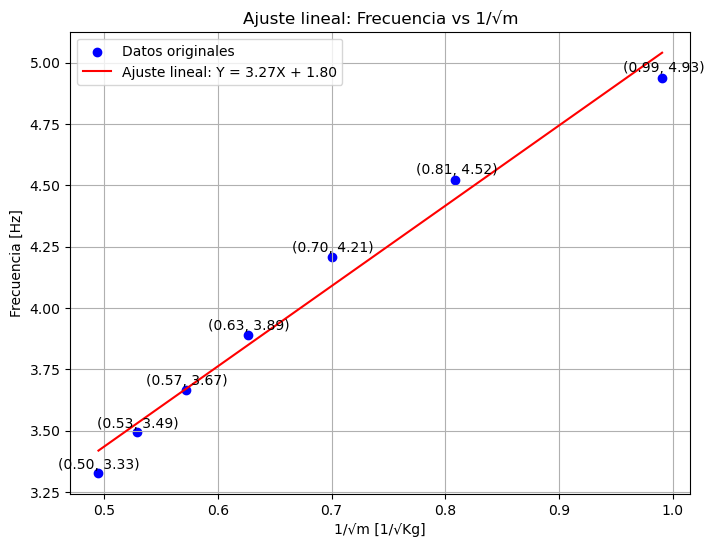

C:\Users\chelo\AppData\Local\Temp\ipykernel_18900\4048743687.py:52: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f"({x_val:.2f}, {f_val:.2f})",  # Formato con dos decimales


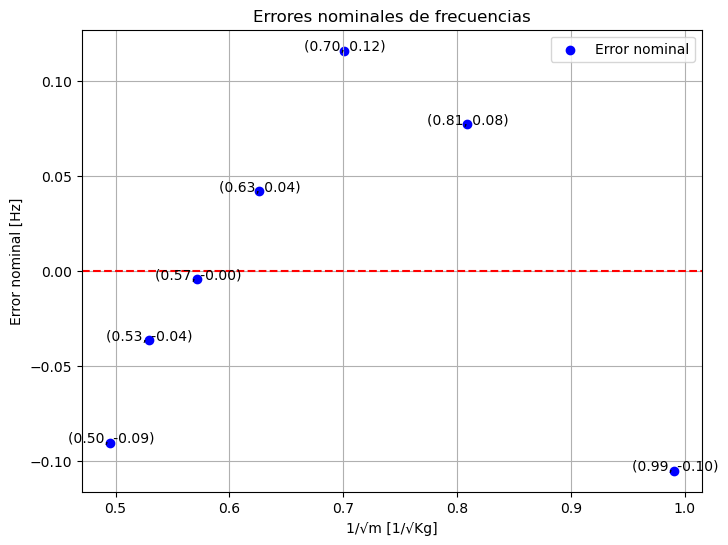

C:\Users\chelo\AppData\Local\Temp\ipykernel_18900\4048743687.py:70: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f"({x_val:.2f}, {f_val:.2f})",  # Formato con dos decimales


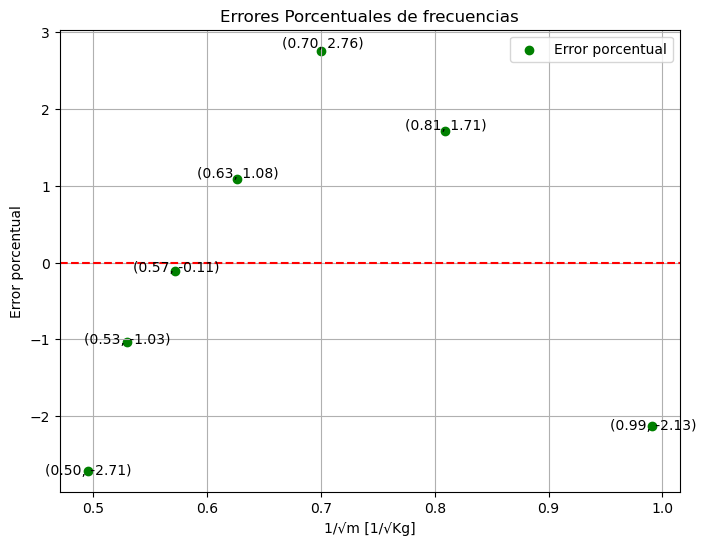

Errores nominales: [-0.10498752  0.07722497  0.1160273   0.04217317 -0.00408296 -0.03616184
 -0.09019312]
Errores porcentuales: [-2.12740676  1.7077615   2.75861382  1.08414316 -0.11140416 -1.03496963
 -2.7101297 ]
Masa del ajuste linea 3.310169516806748
valor de K 10.724949234453865


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Ejemplo de datos de masas m y frecuencias
X = np.array([0.99045,0.80870,0.70036,0.62642,0.57184,0.52942,0.49523])  # Puedes ajustar estos valores según tu caso
frecuencia = np.array([4.935,4.522,4.206,3.890,3.665,3.494,3.328])  # Valores de frecuencia correspondientes

# Calcular X como 1/raíz(m)
#X = 1 / np.sqrt(m)

# Y son los valores de frecuencia
Y = frecuencia

# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(X, Y)

# Calcular los valores ajustados
Y_fit = slope * X + intercept
print("frecuencia", intercept)
# Calcular errores nominales y porcentuales
error_nominal = Y - Y_fit
error_porcentual = 100 * error_nominal / Y

# Variación en la posición de las etiquetas según el índice del punto
#offsets = [(10, 5), (-10, 10), (15, -10), (-15, -15), (10, 10)]  # Ejemplo de desplazamientos

# Gráfico de ajuste lineal (X vs Y)
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Datos originales')
plt.plot(X, Y_fit, color='red', label=f'Ajuste lineal: Y = {slope:.2f}X + {intercept:.2f}')
# Etiquetar los puntos con variación en la posición
for i, (x_val, f_val) in enumerate(zip(X, frecuencia)):
    plt.annotate(f"({x_val:.2f}, {f_val:.2f})",  # Formato con dos decimales
                 (x_val, f_val),                 # Coordenadas del punto
                 textcoords="offset points",     # Offset para que el texto no esté encima del punto
                 #xytext=offsets[i],              # Desplazar el texto según el índice
                 ha='center')                    # Alinear horizontalmente el texto

plt.xlabel('1/√m [1/√Kg]')
plt.ylabel('Frecuencia [Hz]')
plt.title('Ajuste lineal: Frecuencia vs 1/√m')
plt.grid(True)
plt.legend()
plt.show()

# Gráfico de errores nominales
plt.figure(figsize=(8, 6))
plt.scatter(X, error_nominal, color='blue', label='Error nominal')
# Etiquetar los puntos con variación en la posición
for i, (x_val, f_val) in enumerate(zip(X, error_nominal)):
    plt.annotate(f"({x_val:.2f}, {f_val:.2f})",  # Formato con dos decimales
                 (x_val, f_val),                 # Coordenadas del punto
                 textcoords="offset points",     # Offset para que el texto no esté encima del punto
                 #xytext=offsets[i],              # Desplazar el texto según el índice
                 ha='center')   
plt.axhline(0, color='red', linestyle='--')  # Línea de error 0
plt.xlabel('1/√m [1/√Kg]')
plt.ylabel('Error nominal [Hz]')
plt.title('Errores nominales de frecuencias')
plt.grid(True)
plt.legend()
plt.show()

# Gráfico de errores porcentuales
plt.figure(figsize=(8, 6))
plt.scatter(X, error_porcentual, color='green', label='Error porcentual')
# Etiquetar los puntos con variación en la posición
for i, (x_val, f_val) in enumerate(zip(X, error_porcentual)):
    plt.annotate(f"({x_val:.2f}, {f_val:.2f})",  # Formato con dos decimales
                 (x_val, f_val),                 # Coordenadas del punto
                 textcoords="offset points",     # Offset para que el texto no esté encima del punto
                 #xytext=offsets[i],              # Desplazar el texto según el índice
                 ha='center')   
plt.axhline(0, color='red', linestyle='--')  # Línea de error 0
plt.xlabel('1/√m [1/√Kg]')
plt.ylabel('Error porcentual')
plt.title('Errores Porcentuales de frecuencias')
plt.grid(True)
plt.legend()
plt.show()

# Imprimir los errores nominales y porcentuales
print(f"Errores nominales: {error_nominal}")
print(f"Errores porcentuales: {error_porcentual}")
print("Masa del ajuste linea", slope**2/1.8**2)
print("valor de K", slope**2)


C:\Users\chelo\AppData\Local\Temp\ipykernel_18900\535375188.py:31: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f"({x_val:.2f}, {f_val:.2f})",  # Formato con dos decimales


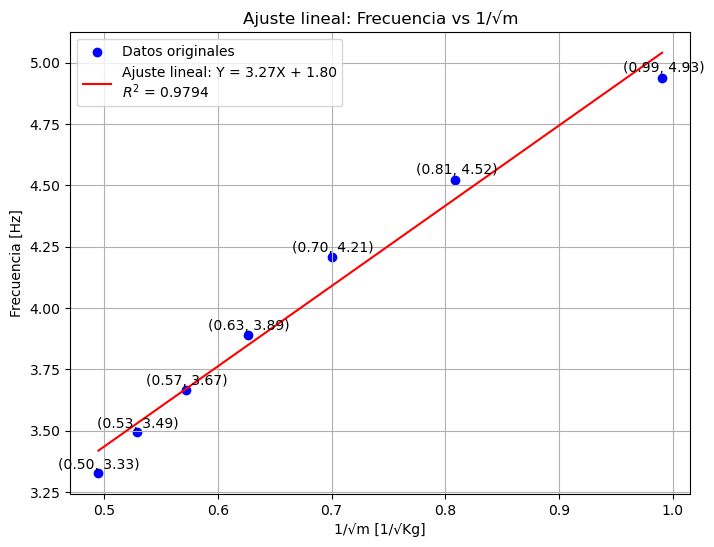

C:\Users\chelo\AppData\Local\Temp\ipykernel_18900\535375188.py:48: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f"({x_val:.2f}, {f_val:.2f})",  # Formato con dos decimales


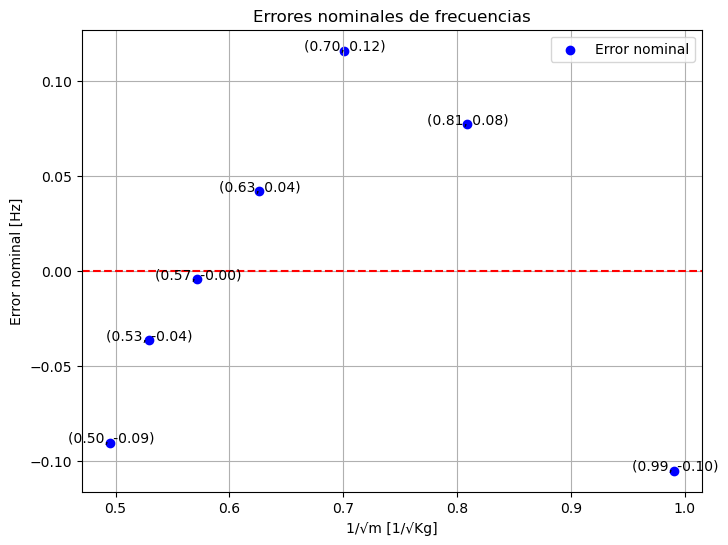

C:\Users\chelo\AppData\Local\Temp\ipykernel_18900\535375188.py:65: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f"({x_val:.2f}, {f_val:.2f})",  # Formato con dos decimales


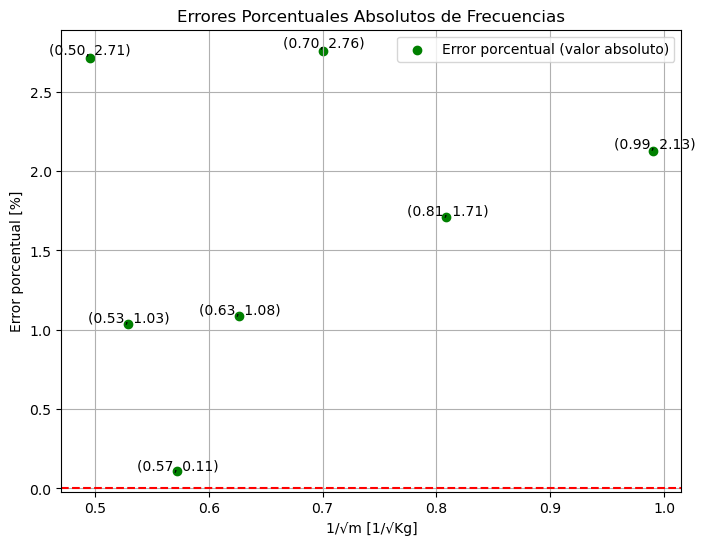

Errores nominales: [-0.10498752  0.07722497  0.1160273   0.04217317 -0.00408296 -0.03616184
 -0.09019312]
Errores porcentuales (valor absoluto): [2.12740676 1.7077615  2.75861382 1.08414316 0.11140416 1.03496963
 2.7101297 ]
Masa del ajuste lineal: 3.310169516806748
Valor de K: 10.724949234453865


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Ejemplo de datos de masas m y frecuencias
X = np.array([0.99045, 0.80870, 0.70036, 0.62642, 0.57184, 0.52942, 0.49523])  # Puedes ajustar estos valores según tu caso
frecuencia = np.array([4.935, 4.522, 4.206, 3.890, 3.665, 3.494, 3.328])  # Valores de frecuencia correspondientes

# Y son los valores de frecuencia
Y = frecuencia

# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(X, Y)

# Calcular los valores ajustados
Y_fit = slope * X + intercept

# Calcular R^2
r_squared = r_value ** 2

# Calcular errores nominales y porcentuales (en valor absoluto)
error_nominal = Y - Y_fit
error_porcentual = 100 * np.abs(error_nominal / Y)

# Gráfico de ajuste lineal (X vs Y)
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Datos originales')
plt.plot(X, Y_fit, color='red', label=f'Ajuste lineal: Y = {slope:.2f}X + {intercept:.2f}\n$R^2$ = {r_squared:.4f}')
# Etiquetar los puntos con variación en la posición
for i, (x_val, f_val) in enumerate(zip(X, frecuencia)):
    plt.annotate(f"({x_val:.2f}, {f_val:.2f})",  # Formato con dos decimales
                 (x_val, f_val),                 # Coordenadas del punto
                 textcoords="offset points",     # Offset para que el texto no esté encima del punto
                 ha='center')                    # Alinear horizontalmente el texto

plt.xlabel('1/√m [1/√Kg]')
plt.ylabel('Frecuencia [Hz]')
plt.title('Ajuste lineal: Frecuencia vs 1/√m')
plt.grid(True)
plt.legend()
plt.show()

# Gráfico de errores nominales
plt.figure(figsize=(8, 6))
plt.scatter(X, error_nominal, color='blue', label='Error nominal')
# Etiquetar los puntos con variación en la posición
for i, (x_val, f_val) in enumerate(zip(X, error_nominal)):
    plt.annotate(f"({x_val:.2f}, {f_val:.2f})",  # Formato con dos decimales
                 (x_val, f_val),                 # Coordenadas del punto
                 textcoords="offset points",     # Offset para que el texto no esté encima del punto
                 ha='center')   
plt.axhline(0, color='red', linestyle='--')  # Línea de error 0
plt.xlabel('1/√m [1/√Kg]')
plt.ylabel('Error nominal [Hz]')
plt.title('Errores nominales de frecuencias')
plt.grid(True)
plt.legend()
plt.show()

# Gráfico de errores porcentuales (valor absoluto)
plt.figure(figsize=(8, 6))
plt.scatter(X, error_porcentual, color='green', label='Error porcentual (valor absoluto)')
# Etiquetar los puntos con variación en la posición
for i, (x_val, f_val) in enumerate(zip(X, error_porcentual)):
    plt.annotate(f"({x_val:.2f}, {f_val:.2f})",  # Formato con dos decimales
                 (x_val, f_val),                 # Coordenadas del punto
                 textcoords="offset points",     # Offset para que el texto no esté encima del punto
                 ha='center')   
plt.axhline(0, color='red', linestyle='--')  # Línea de error 0
plt.xlabel('1/√m [1/√Kg]')
plt.ylabel('Error porcentual [%]')
plt.title('Errores Porcentuales Absolutos de Frecuencias')
plt.grid(True)
plt.legend()
plt.show()

# Imprimir los errores nominales y porcentuales
print(f"Errores nominales: {error_nominal}")
print(f"Errores porcentuales (valor absoluto): {error_porcentual}")
print("Masa del ajuste lineal:", slope**2 / 1.8**2)
print("Valor de K:", slope**2)


La frecuencia del sistema w_ 1 es 1.6913784366454903
La masa del sistema, asociada a la recta  1 es 3.7489846843759485
La frecuencia del sistema w_ 2 es 1.8735909351458515
La masa del sistema, asociada a la recta  2 es 3.0552425384354986
La frecuencia del sistema w_ 3 es 1.9123932574981435
La masa del sistema, asociada a la recta  3 es 2.9325190193680393
La frecuencia del sistema w_ 4 es 1.8385391289650852
La masa del sistema, asociada a la recta  4 es 3.1728496337211967
La frecuencia del sistema w_ 5 es 1.7922829978407364
La masa del sistema, asociada a la recta  5 es 3.338735963936979
La frecuencia del sistema w_ 6 es 1.7602041212871482
La masa del sistema, asociada a la recta  6 es 3.4615385946396504
La frecuencia del sistema w_ 7 es 1.706172843838605
La masa del sistema, asociada a la recta  7 es 3.6842508691389493


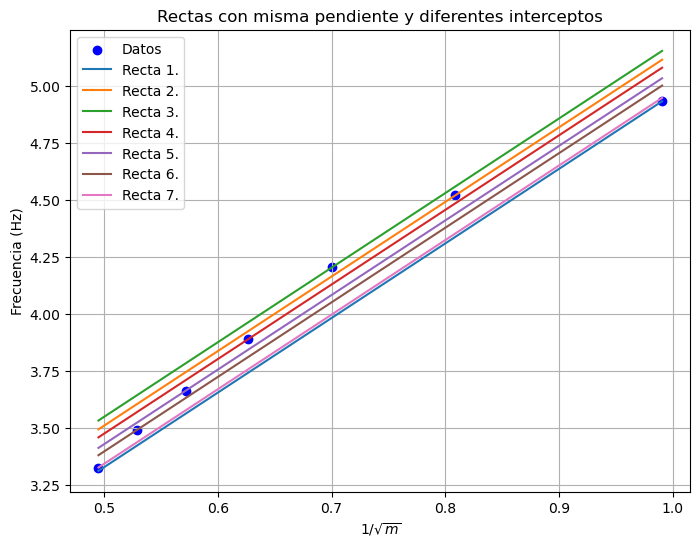

Omega promedio 1.796365960174437
masa_sistema usando promedio de frecuencias 3.323575978203328


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import math

# Datos de ejemplo
# Ejemplo de datos de masas m y frecuencias
X = np.array([0.99045,0.80870,0.70036,0.62642,0.57184,0.52942,0.49523])  # Puedes ajustar estos valores según tu caso
frecuencia = np.array([4.935,4.522,4.206,3.890,3.665,3.494,3.328])  # Valores de frecuencia correspondientes

# Realizar el ajuste lineal para obtener la pendiente
slope, intercept, r_value, p_value, std_err = linregress(X, frecuencia)

# Crear el gráfico con los puntos
plt.figure(figsize=(8, 6))
plt.scatter(X, frecuencia, color='blue', label='Datos')

# Graficar 5 rectas con la misma pendiente y diferentes interceptos
X_range = np.linspace(min(X), max(X), 100)  # Generar puntos para graficar las rectas

for i in range(len(X)):
    intercepto_i = frecuencia[i] - slope * X[i]  # Calcular el intercepto de cada recta
    intercepto_i_aproximado = round(intercepto_i, 2)
    Y_fit_i = slope * X_range + intercepto_i  # Ecuación de la recta ajustada
    plt.plot(X_range, Y_fit_i, label=f'Recta {i+1}.')
    print("La frecuencia del sistema w_",i+1,"es", intercepto_i)
    print("La masa del sistema, asociada a la recta ", i+1,"es", slope**2/intercepto_i**2)

# Etiquetas y título
plt.xlabel(r'$1/\sqrt{m}$')
plt.ylabel('Frecuencia (Hz)')
plt.title('Rectas con misma pendiente y diferentes interceptos')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()
w=np.mean([1.6913784366454903,1.8735909351458515, 1.9123932574981435, 1.8385391289650852, 1.7922829978407364,1.7602041212871482,1.706172843838605])
masa_sistema=slope**2/w**2
print("Omega promedio", w)
print("masa_sistema usando promedio de frecuencias",masa_sistema)



C:\Users\chelo\AppData\Local\Temp\ipykernel_18900\1555646112.py:19: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f"({x_val:.2f}, {f_val:.2f})",  # Formato con dos decimales


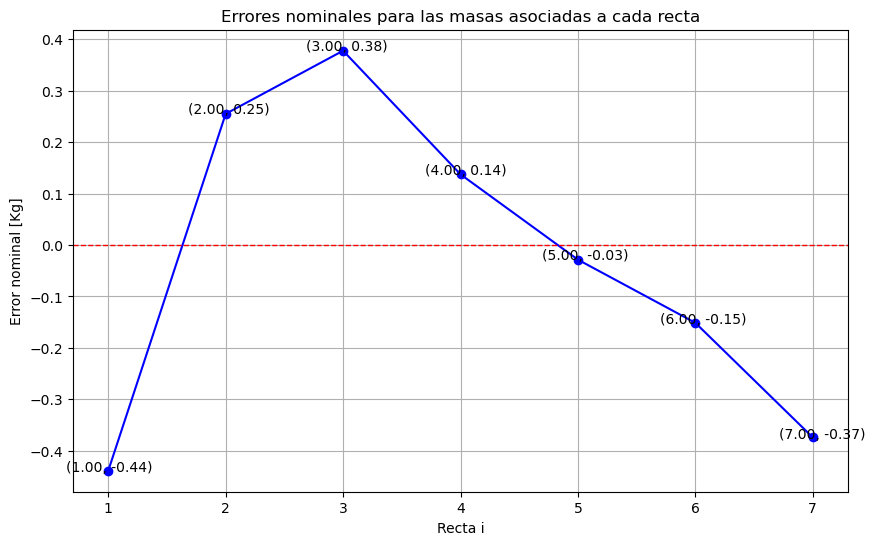

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
masas = np.array([3.7489846843759485, 3.0552425384354986, 2.9325190193680393, 3.1728496337211967, 3.338735963936979, 3.4615385946396504, 3.6842508691389493])  # Valores de 1/sqrt(m)
frecuencia = np.array([4.935,4.522,4.206,3.890,3.665,3.494,3.328])  # Valores de frecuencia correspondientes
masa_ajuste_lineal = 3.310169516806748

# Calcular los errores nominales
errores = [masa_ajuste_lineal - masa for masa in masas]

# Ejes para el gráfico
rectas = np.arange(1, len(errores) + 1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(rectas, errores, marker='o', linestyle='-', color='b')
for i, (x_val, f_val) in enumerate(zip(rectas, errores)):
    plt.annotate(f"({x_val:.2f}, {f_val:.2f})",  # Formato con dos decimales
                 (x_val, f_val),                 # Coordenadas del punto
                 textcoords="offset points",     # Offset para que el texto no esté encima del punto
                 #xytext=offsets[i],              # Desplazar el texto según el índice
                 ha='center')   
plt.axhline(0, color='r', linestyle='--', linewidth=1)
plt.title('Errores nominales para las masas asociadas a cada recta')
plt.xlabel('Recta i')
plt.ylabel('Error nominal [Kg]')
plt.xticks(rectas)
plt.grid()
plt.show()

C:\Users\chelo\AppData\Local\Temp\ipykernel_18900\763987042.py:19: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f"({x_val:.2f}, {f_val:.2f})",  # Formato con dos decimales


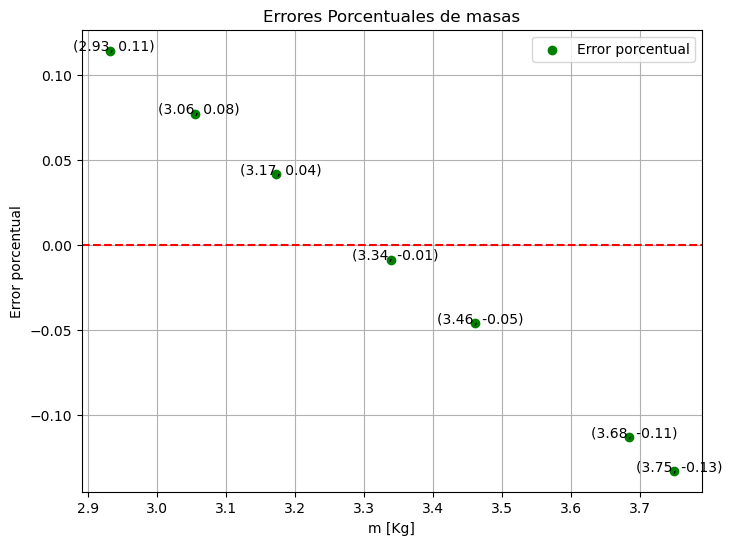

In [49]:
# Datos de ejemplo
masas = np.array([3.7489846843759485, 3.0552425384354986, 2.9325190193680393, 3.1728496337211967, 3.338735963936979, 3.4615385946396504, 3.6842508691389493])  # Valores de 1/sqrt(m)
frecuencia = np.array([4.935,4.522,4.206,3.890,3.665,3.494,3.328])  # Valores de frecuencia correspondientes
masa_ajuste_lineal = 3.310169516806748

# Calcular los errores nominales
arreglo=[]
for i in range(len(masas)):
    arreglo.append((masa_ajuste_lineal-masas[i])/masa_ajuste_lineal)
errores=(masa_ajuste_lineal-masas)/masa_ajuste_lineal
#errores = (np.array(int(masa_ajuste_lineal - masa for masa in masas)))*100/masa_ajuste_lineal

#error_porcentual = 100 * errores / masas

# Gráfico de errores porcentuales
plt.figure(figsize=(8, 6))
plt.scatter(masas, arreglo, color='green', label='Error porcentual')
for i, (x_val, f_val) in enumerate(zip(masas, errores)):
    plt.annotate(f"({x_val:.2f}, {f_val:.2f})",  # Formato con dos decimales
                 (x_val, f_val),                 # Coordenadas del punto
                 textcoords="offset points",     # Offset para que el texto no esté encima del punto
                 #xytext=offsets[i],              # Desplazar el texto según el índice
                 ha='center')   
plt.axhline(0, color='red', linestyle='--')  # Línea de error 0
plt.xlabel('m [Kg]')
plt.ylabel('Error porcentual')
plt.title('Errores Porcentuales de masas')
plt.grid(True)
plt.legend()
plt.show()

# Imprimir los errores nominales y porcentuales
#print(f"Errores nominales: {error_nominal}")
#print(f"Errores porcentuales: {error_porcentual}")

C:\Users\chelo\AppData\Local\Temp\ipykernel_18900\4186196579.py:17: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f"({x_val:.2f}, {f_val:.2f}%)",  # Formato con dos decimales y %


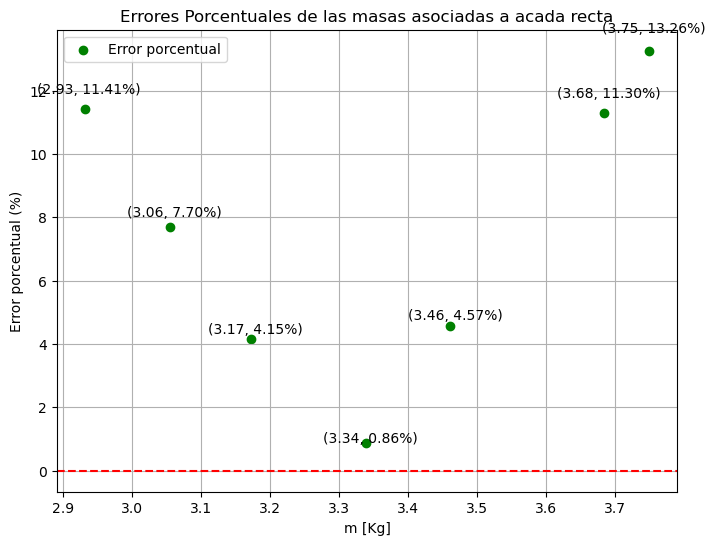

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
masas = np.array([3.7489846843759485, 3.0552425384354986, 2.9325190193680393, 3.1728496337211967, 3.338735963936979, 3.4615385946396504, 3.6842508691389493])  # Valores de 1/sqrt(m)
frecuencia = np.array([4.935,4.522,4.206,3.890,3.665,3.494,3.328])  # Valores de frecuencia correspondientes
masa_ajuste_lineal = 3.310169516806748
# Calcular los errores porcentuales en valor absoluto
errores = np.abs((masas - masa_ajuste_lineal) / masa_ajuste_lineal) * 100  # Error relativo al valor medido (masas)

# Graficar los errores porcentuales
plt.figure(figsize=(8, 6))
plt.scatter(masas, errores, color='green', label='Error porcentual')  # Los errores ya están en porcentaje

# Anotar los puntos en el gráfico
for i, (x_val, f_val) in enumerate(zip(masas, errores)):
    plt.annotate(f"({x_val:.2f}, {f_val:.2f}%)",  # Formato con dos decimales y %
                 (x_val, f_val),                  # Coordenadas del punto
                 textcoords="offset points",      # Offset para que el texto no esté encima del punto
                 ha='center')

plt.axhline(0, color='red', linestyle='--')  # Línea de error 0
plt.xlabel('m [Kg]')
plt.ylabel('Error porcentual (%)')
plt.title('Errores Porcentuales de las masas asociadas a acada recta')
plt.grid(True)
plt.legend()
plt.show()


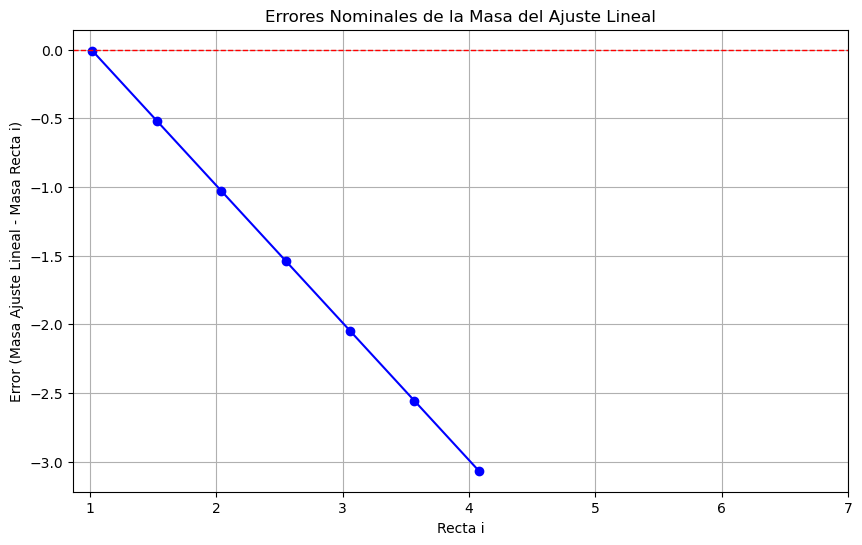

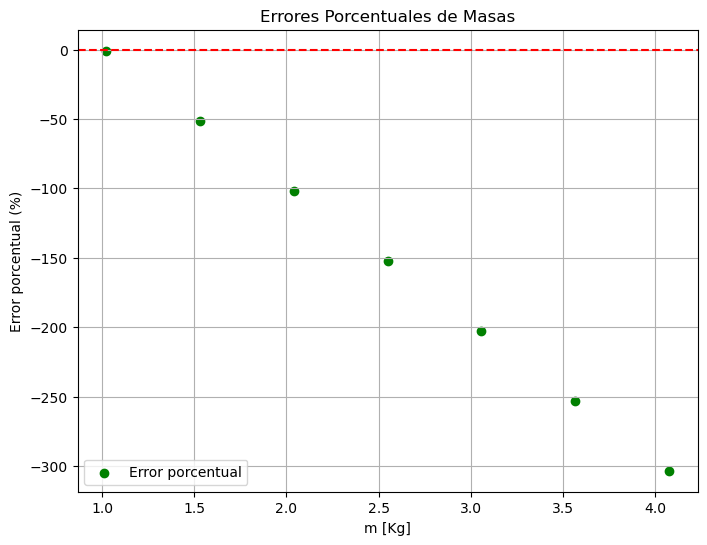

Errores nominales: [-0.00859737 -0.51828136 -1.02796536 -1.53764935 -2.04733335 -2.55701735
 -3.06670134]
Errores porcentuales: [  -0.85057538  -51.27586306 -101.70115075 -152.12643844 -202.55172613
 -252.97701372 -303.40230141]


In [24]:
import numpy as np
import matplotlib.pyplot as plt

masas = np.array([1.019367992,1.529051988,2.038735984,2.54841998, 3.058103976, 3.567787971, 4.077471967])  # Valores de 1/sqrt(m)
frecuencia = np.array([4.935,4.522,4.206,3.890,3.665,3.494,3.328])  # Valores de frecuencia correspondientes
masa_ajuste_lineal = 1.0107706259452178

# Calcular errores nominales
errores_nominales = masa_ajuste_lineal - masas

# Calcular errores porcentuales
errores_porcentuales = (errores_nominales / masa_ajuste_lineal) * 100


# Graficar
plt.figure(figsize=(10, 6))
plt.plot(masas, errores_nominales, marker='o', linestyle='-', color='b')
plt.axhline(0, color='r', linestyle='--', linewidth=1)
plt.title('Errores Nominales de la Masa del Ajuste Lineal')
plt.xlabel('Recta i')
plt.ylabel('Error (Masa Ajuste Lineal - Masa Recta i)')
plt.xticks(rectas)
plt.grid()
plt.show()

# Gráfico de errores porcentuales
plt.figure(figsize=(8, 6))
plt.scatter(masas, errores_porcentuales, color='green', label='Error porcentual')
plt.axhline(0, color='red', linestyle='--')  # Línea de error 0
plt.xlabel('m [Kg]')
plt.ylabel('Error porcentual (%)')
plt.title('Errores Porcentuales de Masas')
plt.grid(True)
plt.legend()
plt.show()

# Imprimir los errores nominales y porcentuales
print(f"Errores nominales: {errores_nominales}")
print(f"Errores porcentuales: {errores_porcentuales}")


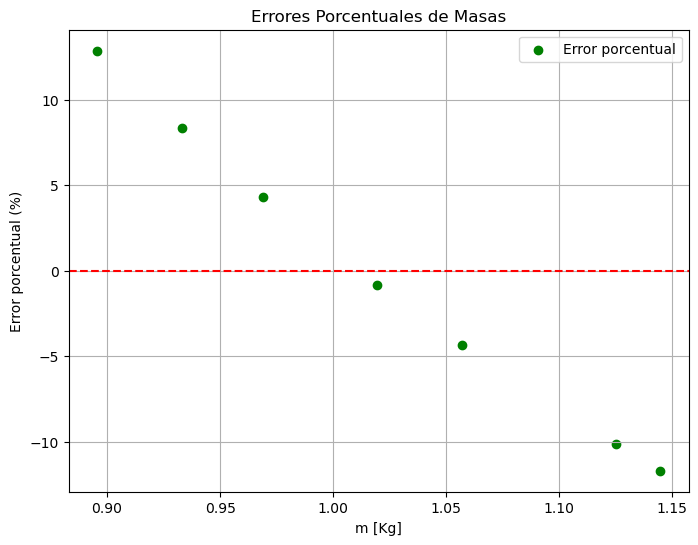

Errores nominales: [-0.13399359  0.07784275  0.11531676  0.04193106 -0.00872285 -0.04622102
 -0.11422691]
Errores porcentuales: [-11.70490692   8.34391951  12.87802381   4.32796694  -0.85560666
  -4.3728843  -10.15352552]


In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
masas = np.array([1.1447642112725493, 0.9329278749349305, 0.8954538641459968,
                  0.9688395697028163, 1.019493480016664, 1.0569916477911045, 
                  1.124997538111338])  # Valores de 1/sqrt(m)
frecuencia = np.array([4.935, 4.522, 4.206, 3.890, 3.665, 3.494, 3.328])  # Valores de frecuencia correspondientes
masa_ajuste_lineal = 1.0107706259452178

# Calcular errores nominales
errores_nominales = masa_ajuste_lineal - masas

# Calcular errores porcentuales
errores_porcentuales = (errores_nominales / masas) * 100

# Gráfico de errores porcentuales
plt.figure(figsize=(8, 6))
plt.scatter(masas, errores_porcentuales, color='green', label='Error porcentual')
plt.axhline(0, color='red', linestyle='--')  # Línea de error 0
plt.xlabel('m [Kg]')
plt.ylabel('Error porcentual (%)')
plt.title('Errores Porcentuales de Masas')
plt.grid(True)
plt.legend()
plt.show()

# Imprimir los errores nominales y porcentuales
print(f"Errores nominales: {errores_nominales}")
print(f"Errores porcentuales: {errores_porcentuales}")


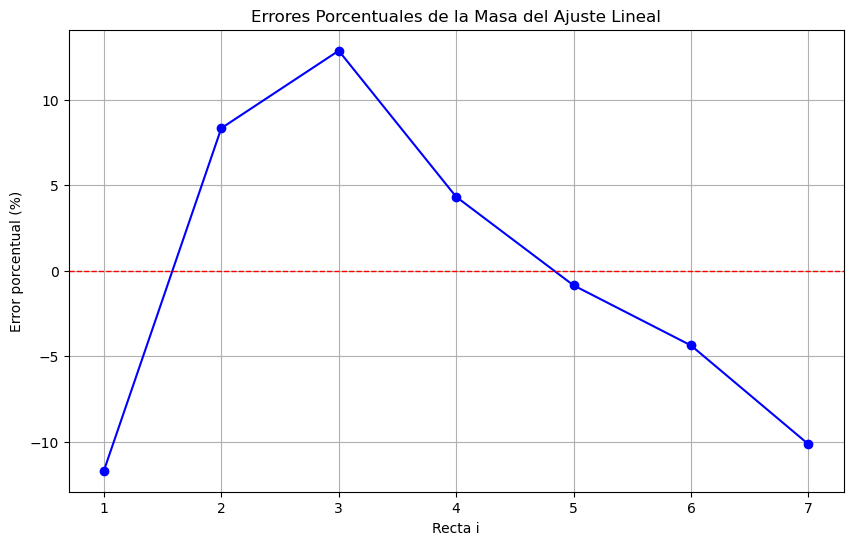

Errores nominales: [-0.13399358532733152, 0.07784275101028737, 0.11531676179922101, 0.041931056242401565, -0.008722854071446129, -0.04622102184588672, -0.11422691216612013]
Errores porcentuales: [-11.704906915143757, 8.34391951421933, 12.8780238063074, 4.327966936286838, -0.8556066558957838, -4.372884302584525, -10.153525523076782]


In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
# Datos de ejemplo
masas = np.array([1.1447642112725493, 0.9329278749349305, 0.8954538641459968,0.9688395697028163, 1.019493480016664,1.0569916477911045,1.124997538111338])  # Valores de 1/sqrt(m)
frecuencia = np.array([4.935,4.522,4.206,3.890,3.665,3.494,3.328])  # Valores de frecuencia correspondientes
masa_ajuste_lineal = 1.0107706259452178
masa_ajuste_lineal = 1.0107706259452178

# Calcular los errores nominales
errores_nominales = [masa_ajuste_lineal - masa for masa in masas]

# Calcular los errores porcentuales
errores_porcentuales = [(error / masa) * 100 for error, masa in zip(errores_nominales, masas)]

# Ejes para el gráfico
rectas = np.arange(1, len(errores_porcentuales) + 1)

# Graficar errores porcentuales
plt.figure(figsize=(10, 6))
plt.plot(rectas, errores_porcentuales, marker='o', linestyle='-', color='b')
plt.axhline(0, color='r', linestyle='--', linewidth=1)
plt.title('Errores Porcentuales de la Masa del Ajuste Lineal')
plt.xlabel('Recta i')
plt.ylabel('Error porcentual (%)')
plt.xticks(rectas)
plt.grid()
plt.show()

# Imprimir los errores nominales y porcentuales
print(f"Errores nominales: {errores_nominales}")
print(f"Errores porcentuales: {errores_porcentuales}")


C:\Users\chelo\AppData\Local\Temp\ipykernel_18900\4077773870.py:24: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f"({x_val:.2f}, {f_val:.2f})",  # Formato con dos decimales


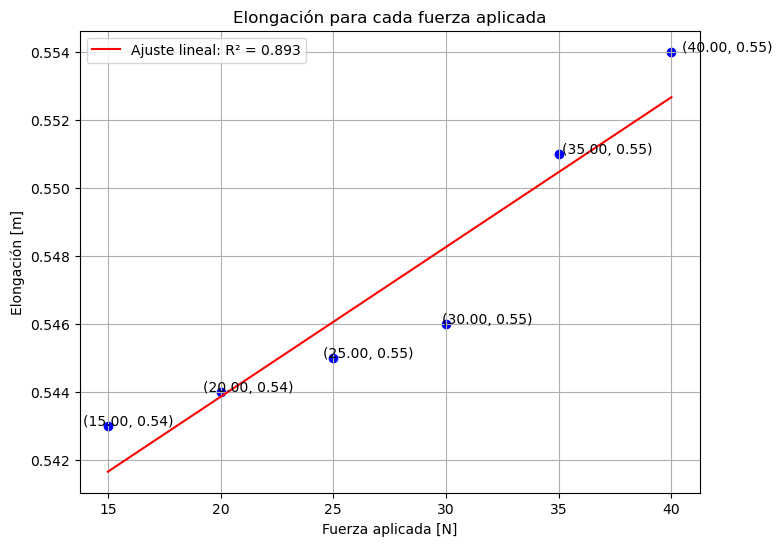

R²: 0.893
Intercepto (intersección con el eje Y): 0.535
Pendiente: 0.000
K= 2272.7272727272707
masa asociada 709.31845845238


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Arreglos de ejemplo
X = np.array([15,20,25,30,35,40])
Y = np.array([ 0.543, 0.544, 0.545, 0.546, 0.551,0.554])

# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(X, Y)

# Calcular los valores ajustados
Y_fit = slope * X + intercept

# Calcular R^2
r_squared = r_value**2

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='')
plt.plot(X, Y_fit, color='red', label='Ajuste lineal: R² = {:.3f}'.format(r_squared))
# Anotar los puntos en el gráfico
for i, (x_val, f_val) in enumerate(zip(X,Y)):
    plt.annotate(f"({x_val:.2f}, {f_val:.2f})",  # Formato con dos decimales
                 (x_val, f_val),                 # Coordenadas del punto
                 textcoords="offset points",     # Offset para que el texto no esté encima del punto
                 #xytext=offsets[i],              # Desplazar el texto según el índice
                 ha='center')   
plt.xlabel('Fuerza aplicada [N]')
plt.ylabel('Elongación [m]')
plt.title('Elongación para cada fuerza aplicada')
plt.legend()
plt.grid()
plt.show()

# Imprimir R^2
print(f'R²: {r_squared:.3f}')
print(f'Intercepto (intersección con el eje Y): {intercept:.3f}')
print(f'Pendiente: {slope:.3f}')
K=1/slope
print("K=",K)
print("masa asociada",K/ 1.79**2)


C:\Users\chelo\AppData\Local\Temp\ipykernel_19396\1754213574.py:34: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f"({x_val:.2f}, {f_val:.2f})",  # Formato con dos decimales


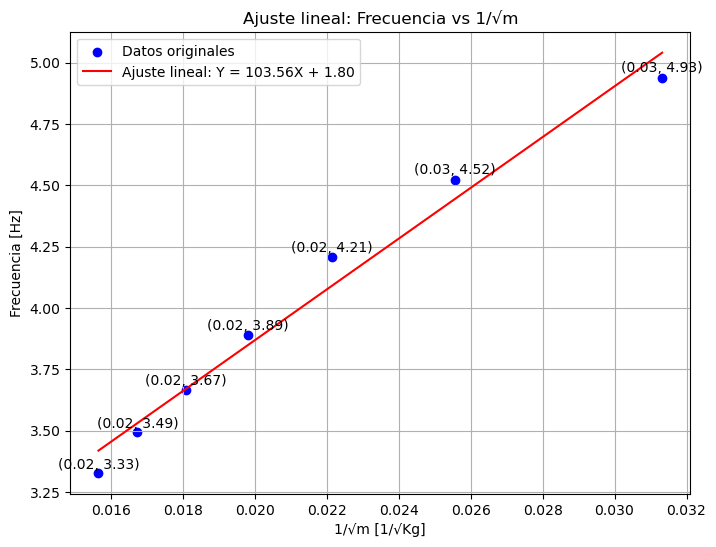

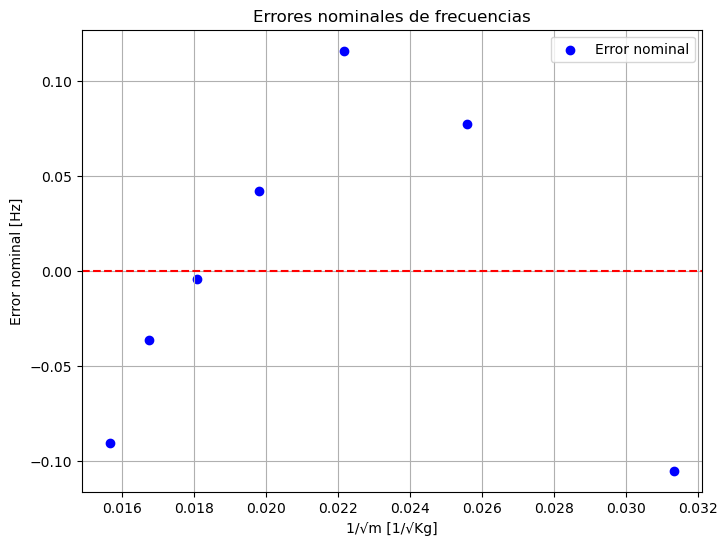

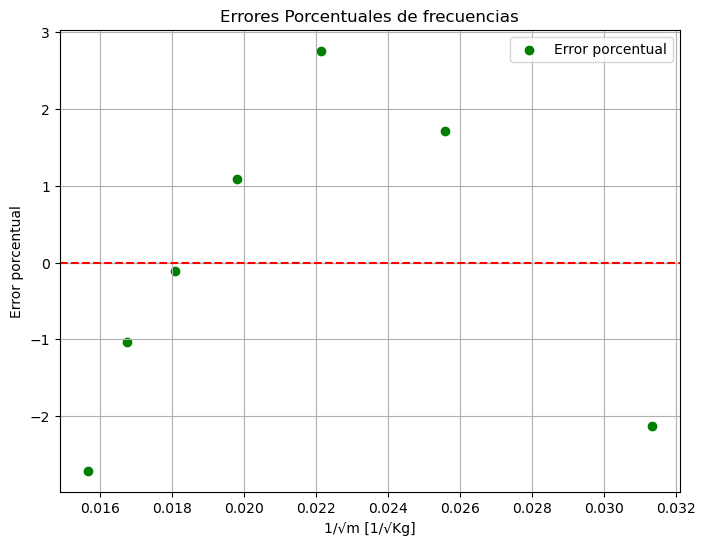

Errores nominales: [-0.10498752  0.07722497  0.1160273   0.04217317 -0.00408296 -0.03616184
 -0.09019312]
Errores porcentuales: [-2.12740676  1.7077615   2.75861382  1.08414316 -0.11140416 -1.03496963
 -2.7101297 ]
Masa del ajuste linea 31.96337369980973
valor de K 10724.94923445387


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Ejemplo de datos de masas m y frecuencias
X = np.sqrt(10**-3)*np.array([0.99045,0.80870,0.70036,0.62642,0.57184,0.52942,0.49523])  # Puedes ajustar estos valores según tu caso
frecuencia = np.array([4.935,4.522,4.206,3.890,3.665,3.494,3.328])  # Valores de frecuencia correspondientes

# Calcular X como 1/raíz(m)
#X = 

# Y son los valores de frecuencia
Y = frecuencia

# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(X, Y)

# Calcular los valores ajustados
Y_fit = slope * X + intercept

# Calcular errores nominales y porcentuales
error_nominal = Y - Y_fit
error_porcentual = 100 * error_nominal / Y

# Variación en la posición de las etiquetas según el índice del punto
#offsets = [(10, 5), (-10, 10), (15, -10), (-15, -15), (10, 10)]  # Ejemplo de desplazamientos

# Gráfico de ajuste lineal (X vs Y)
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Datos originales')
plt.plot(X, Y_fit, color='red', label=f'Ajuste lineal: Y = {slope:.2f}X + {intercept:.2f}')
# Etiquetar los puntos con variación en la posición
for i, (x_val, f_val) in enumerate(zip(X, frecuencia)):
    plt.annotate(f"({x_val:.2f}, {f_val:.2f})",  # Formato con dos decimales
                 (x_val, f_val),                 # Coordenadas del punto
                 textcoords="offset points",     # Offset para que el texto no esté encima del punto
                 #xytext=offsets[i],              # Desplazar el texto según el índice
                 ha='center')                    # Alinear horizontalmente el texto

plt.xlabel('1/√m [1/√Kg]')
plt.ylabel('Frecuencia [Hz]')
plt.title('Ajuste lineal: Frecuencia vs 1/√m')
plt.grid(True)
plt.legend()
plt.show()

# Gráfico de errores nominales
plt.figure(figsize=(8, 6))
plt.scatter(X, error_nominal, color='blue', label='Error nominal')
plt.axhline(0, color='red', linestyle='--')  # Línea de error 0
plt.xlabel('1/√m [1/√Kg]')
plt.ylabel('Error nominal [Hz]')
plt.title('Errores nominales de frecuencias')
plt.grid(True)
plt.legend()
plt.show()

# Gráfico de errores porcentuales
plt.figure(figsize=(8, 6))
plt.scatter(X, error_porcentual, color='green', label='Error porcentual')
plt.axhline(0, color='red', linestyle='--')  # Línea de error 0
plt.xlabel('1/√m [1/√Kg]')
plt.ylabel('Error porcentual')
plt.title('Errores Porcentuales de frecuencias')
plt.grid(True)
plt.legend()
plt.show()

# Imprimir los errores nominales y porcentuales
print(f"Errores nominales: {error_nominal}")
print(f"Errores porcentuales: {error_porcentual}")
print("Masa del ajuste linea", slope/1.8**2)
print("valor de K", slope**2)


C:\Users\chelo\AppData\Local\Temp\ipykernel_18900\4053582510.py:27: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f"({x_val:.2f}, {f_val:.2f})",  # Formato con dos decimales


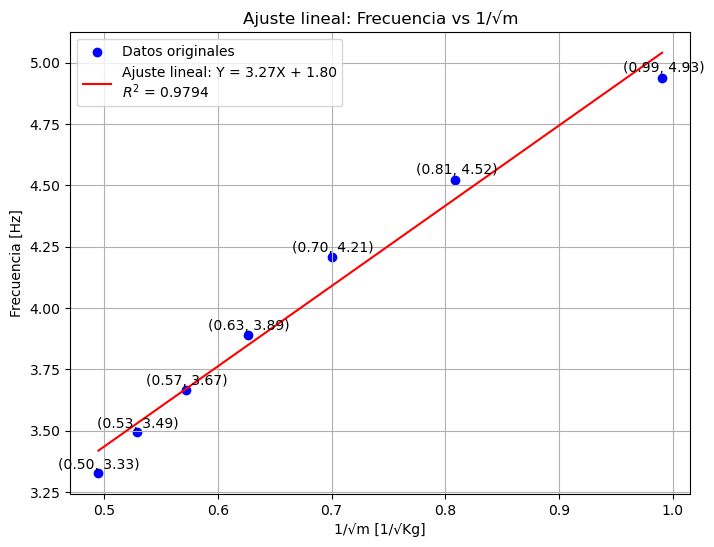

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Ejemplo de datos de masas m y frecuencias
X = np.array([0.99045, 0.80870, 0.70036, 0.62642, 0.57184, 0.52942, 0.49523])  # Puedes ajustar estos valores según tu caso
frecuencia = np.array([4.935, 4.522, 4.206, 3.890, 3.665, 3.494, 3.328])  # Valores de frecuencia correspondientes

# Y son los valores de frecuencia
Y = frecuencia

# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(X, Y)

# Calcular los valores ajustados
Y_fit = slope * X + intercept

# Calcular R^2
r_squared = r_value ** 2

# Gráfico de ajuste lineal (X vs Y)
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Datos originales')
plt.plot(X, Y_fit, color='red', label=f'Ajuste lineal: Y = {slope:.2f}X + {intercept:.2f}\n$R^2$ = {r_squared:.4f}')
# Etiquetar los puntos
for i, (x_val, f_val) in enumerate(zip(X, frecuencia)):
    plt.annotate(f"({x_val:.2f}, {f_val:.2f})",  # Formato con dos decimales
                 (x_val, f_val),                 # Coordenadas del punto
                 textcoords="offset points",     # Offset para que el texto no esté encima del punto
                 ha='center')                    # Alinear horizontalmente el texto

plt.xlabel('1/√m [1/√Kg]')
plt.ylabel('Frecuencia [Hz]')
plt.title('Ajuste lineal: Frecuencia vs 1/√m')
plt.grid(True)
plt.legend()
plt.show()
